<a href="https://colab.research.google.com/github/Shahi77/DeepLearning_Assignments/blob/main/Assignment03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. implement and use gradient descent (and its variants) with backpropagation for a classification task

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: shahi77 (shahi77-national-institute-of-technology-hamirpur) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 134MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 10.7MB/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found




100%|██████████| 1.65M/1.65M [00:00<00:00, 83.6MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.18MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw


Training with SGD
Epoch: 1, Batch: 0, Loss: 2.3107
Epoch: 1, Batch: 100, Loss: 1.0045
Epoch: 1, Batch: 200, Loss: 0.6551
Epoch: 1, Batch: 300, Loss: 0.6073
Epoch: 1, Batch: 400, Loss: 0.4760
Epoch: 1, Batch: 500, Loss: 0.5247
Epoch: 1, Batch: 600, Loss: 0.5444
Epoch: 1, Batch: 700, Loss: 0.2534
Epoch: 1, Batch: 800, Loss: 0.3117
Epoch: 1, Batch: 900, Loss: 0.2724
Epoch: 2, Batch: 0, Loss: 0.4309
Epoch: 2, Batch: 100, Loss: 0.2489
Epoch: 2, Batch: 200, Loss: 0.3826
Epoch: 2, Batch: 300, Loss: 0.3145
Epoch: 2, Batch: 400, Loss: 0.3871
Epoch: 2, Batch: 500, Loss: 0.3107
Epoch: 2, Batch: 600, Loss: 0.4698
Epoch: 2, Batch: 700, Loss: 0.2706
Epoch: 2, Batch: 800, Loss: 0.1646
Epoch: 2, Batch: 900, Loss: 0.3389
Epoch: 3, Batch: 0, Loss: 0.3162
Epoch: 3, Batch: 100, Loss: 0.3480
Epoch: 3, Batch: 200, Loss: 0.2665
Epoch: 3, Batch: 300, Loss: 0.1992
Epoch: 3, Batch: 400, Loss: 0.3304
Epoch: 3, Batch: 500, Loss: 0.4725
Ep

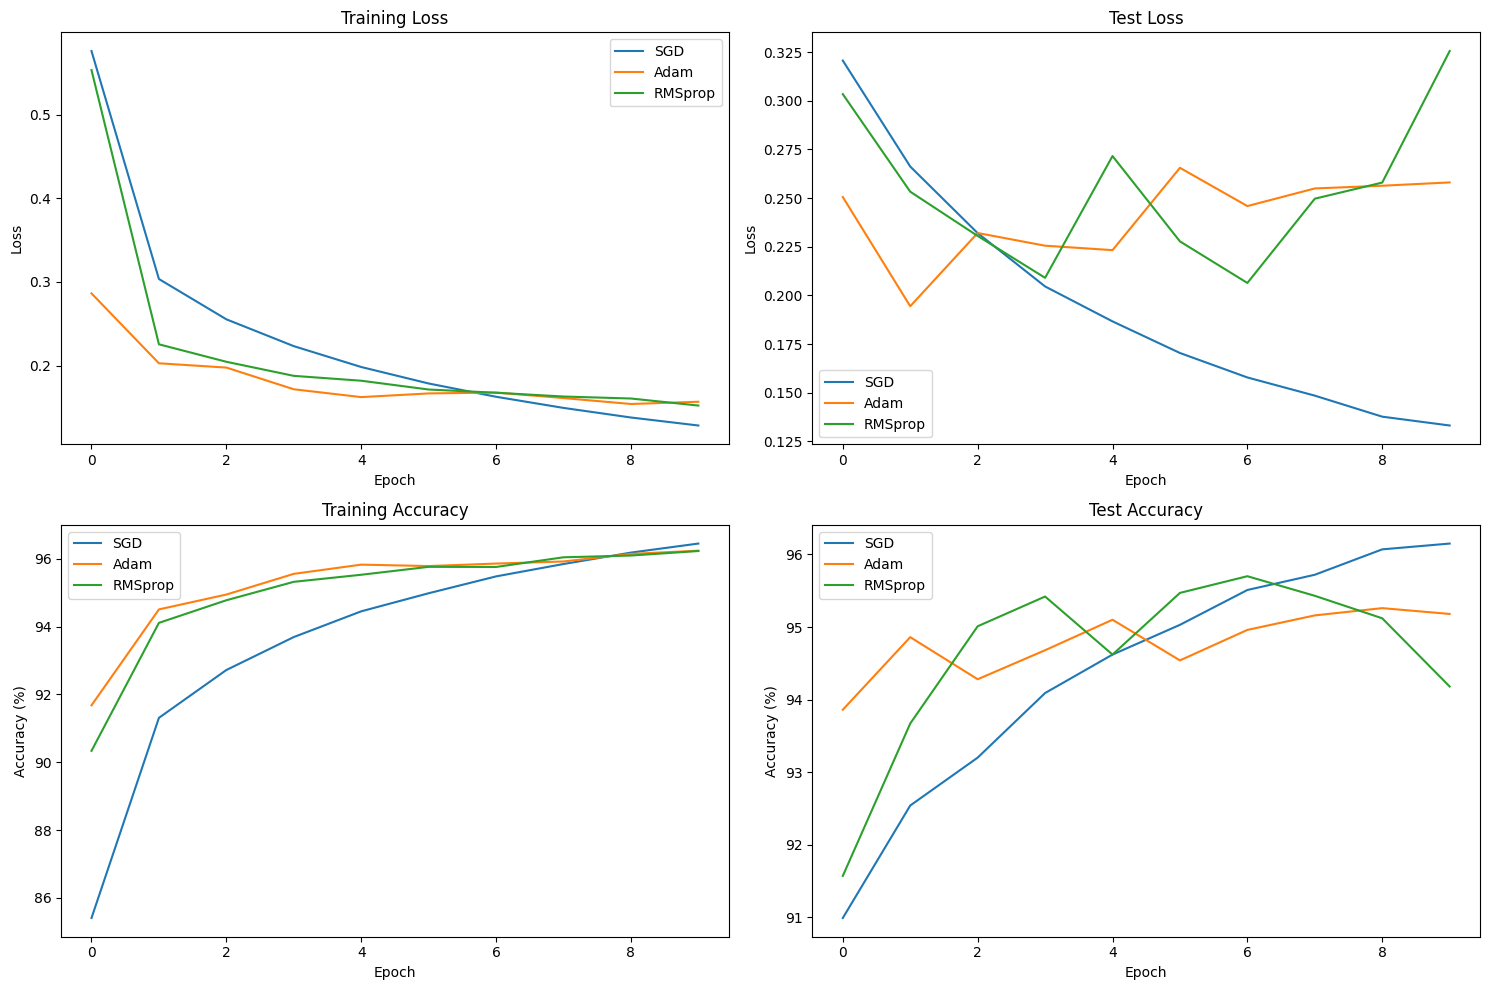

Adam/test_accuracy,▁▆▃▅▇▄▆███
Adam/test_loss,▇▁▅▄▄█▆▇▇▇
Adam/train_accuracy,▁▅▆▇▇▇▇███
Adam/train_loss,█▄▃▂▁▂▂▁▁▁
RMSprop/test_accuracy,▁▅▇█▆███▇▅
RMSprop/test_loss,▇▄▂▁▅▂▁▄▄█
RMSprop/train_accuracy,▁▅▆▇▇▇▇███
RMSprop/train_loss,█▂▂▂▂▁▁▁▁▁
SGD/test_accuracy,▁▃▄▅▆▆▇▇██
SGD/test_loss,█▆▅▄▃▂▂▂▁▁
SGD/train_accuracy,▁▅▆▆▇▇▇███


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import wandb
import matplotlib.pyplot as plt
import numpy as np


wandb.init(project="deep-learning-assignment03", name="gradient-descent-comparison")


torch.manual_seed(42)

config = {
    "epochs": 10,
    "batch_size": 64,
    "learning_rate": 0.01,
    "hidden_size": 128,
    "optimizers": ["SGD", "Adam", "RMSprop"]
}
wandb.config.update(config)

# MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=config["batch_size"], shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=config["batch_size"])

# Neural network
class Net(nn.Module):
    def __init__(self, hidden_size):
        super(Net, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

def train_model(model, device, train_loader, optimizer, criterion, epoch):
    model.train()
    train_loss = 0
    correct = 0
    total = 0

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = output.max(1)
        total += target.size(0)
        correct += predicted.eq(target).sum().item()

        if batch_idx % 100 == 0:
            print(f'Epoch: {epoch}, Batch: {batch_idx}, Loss: {loss.item():.4f}')

    train_loss /= len(train_loader)
    accuracy = 100. * correct / total
    return train_loss, accuracy

def test_model(model, device, test_loader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()
            _, predicted = output.max(1)
            total += target.size(0)
            correct += predicted.eq(target).sum().item()

    test_loss /= len(test_loader)
    accuracy = 100. * correct / total
    return test_loss, accuracy

# Train with different optimizers and track results
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
results = {}

for optimizer_name in config["optimizers"]:
    print(f"\nTraining with {optimizer_name}")
    model = Net(config["hidden_size"]).to(device)
    criterion = nn.CrossEntropyLoss()

    if optimizer_name == "SGD":
        optimizer = optim.SGD(model.parameters(), lr=config["learning_rate"])
    elif optimizer_name == "Adam":
        optimizer = optim.Adam(model.parameters(), lr=config["learning_rate"])
    else:
        optimizer = optim.RMSprop(model.parameters(), lr=config["learning_rate"])

    train_losses = []
    train_accuracies = []
    test_losses = []
    test_accuracies = []

    for epoch in range(1, config["epochs"] + 1):
        train_loss, train_acc = train_model(model, device, train_loader, optimizer, criterion, epoch)
        test_loss, test_acc = test_model(model, device, test_loader, criterion)

        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        test_losses.append(test_loss)
        test_accuracies.append(test_acc)
        wandb.log({
            f"{optimizer_name}/train_loss": train_loss,
            f"{optimizer_name}/train_accuracy": train_acc,
            f"{optimizer_name}/test_loss": test_loss,
            f"{optimizer_name}/test_accuracy": test_acc,
            "epoch": epoch
        })

    results[optimizer_name] = {
        "train_losses": train_losses,
        "train_accuracies": train_accuracies,
        "test_losses": test_losses,
        "test_accuracies": test_accuracies
    }


plt.figure(figsize=(15, 10))


plt.subplot(2, 2, 1)
for opt_name, data in results.items():
    plt.plot(data["train_losses"], label=opt_name)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()


plt.subplot(2, 2, 2)
for opt_name, data in results.items():
    plt.plot(data["test_losses"], label=opt_name)
plt.title("Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()


plt.subplot(2, 2, 3)
for opt_name, data in results.items():
    plt.plot(data["train_accuracies"], label=opt_name)
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()


plt.subplot(2, 2, 4)
for opt_name, data in results.items():
    plt.plot(data["test_accuracies"], label=opt_name)
plt.title("Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()

plt.tight_layout()
wandb.log({"comparison_plots": wandb.Image(plt)})
plt.show()


wandb.finish()

 Implement the experiments submitted  in as assignment 2 with the various gradient descent with different optimization functions.

In [ ]:
## With 5 epochs, with architecture LeNet

import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
import itertools
import time
import torch
import wandb
from torch.utils.data import random_split, DataLoader
from torchvision import datasets, transforms

random.seed(42)
torch.manual_seed(42)

epochs_list = [5]
hidden_layers_list = [4]
hidden_layer_sizes = [128]
weight_decay_list = [0.0005]
learning_rates = [1e-3]
optimizers = ["sgd", "momentum", "nesterov", "rmsprop", "adam", "nadam", "adadelta", "adamw", "adatune", "swa"]
batch_sizes = [64]
weight_initializations = ["random"]
activation_functions = ["sigmoid", "tanh", "relu"]
architectures = ["LeNet"]
datasets_list = ["MNIST", "Fashion-MNIST", "CIFAR-10", "CIFAR-100"]


# Function to split dataset with 10% validation set
def get_data_loaders(dataset_name, batch_size):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    if dataset_name == "MNIST":
        dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
    elif dataset_name == "Fashion-MNIST":
        dataset = datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)
    elif dataset_name == "CIFAR-10":
        dataset = datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
    elif dataset_name == "CIFAR-100":
        dataset = datasets.CIFAR100(root="./data", train=True, download=True, transform=transform)
    else:
        raise ValueError("Unsupported dataset")

    val_size = int(0.1 * len(dataset))
    train_size = len(dataset) - val_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, val_loader


def train_model(config):
    epochs = config["epochs"]
    train_loader, val_loader = get_data_loaders(config["dataset"], config["batch_size"])

    wandb.run.name = f"{config['architecture']}_{config['optimizer']}_lr{config['learning_rate']}_bs{config['batch_size']}"

    for epoch in range(1, epochs + 1):
        acc = 1 - 2 ** -epoch - random.random() / epoch
        loss = 2 ** -epoch + random.random() / epoch

        wandb.log({
            "epoch": epoch,
            "accuracy": acc,
            "loss": loss,
            "learning_rate": config["learning_rate"],
            "batch_size": config["batch_size"],
            "weight_decay": config["weight_decay"],
            "num_hidden_layers": config["num_hidden_layers"],
            "hidden_layer_size": config["hidden_layer_size"],
            "weight_initialization": config["weight_initialization"],
            "activation_function": config["activation_function"],
            "architecture": config["architecture"],
            "dataset": config["dataset"],
            "optimizer": config["optimizer"]
        })

        print(f"Epoch {epoch}/{epochs} - Accuracy: {acc:.4f}, Loss: {loss:.4f}")


for params in itertools.product(
    epochs_list, hidden_layers_list, hidden_layer_sizes,
    weight_decay_list, learning_rates, optimizers, batch_sizes,
    weight_initializations, activation_functions, architectures, datasets_list
):
    config = {
        "epochs": params[0],
        "num_hidden_layers": params[1],
        "hidden_layer_size": params[2],
        "weight_decay": params[3],
        "learning_rate": params[4],
        "optimizer": params[5],
        "batch_size": params[6],
        "weight_initialization": params[7],
        "activation_function": params[8],
        "architecture": params[9],
        "dataset": params[10]
    }

    wandb.init(project="assignment03", config=config, reinit=True)
    train_model(config)
    wandb.finish()

    time.sleep(2)


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 42.7MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.23MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 10.9MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.28MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch 1/5 - Accuracy: -0.1394, Loss: 0.5250
Epoch 2/5 - Accuracy: 0.6125, Loss: 0.3616
Epoch 3/5 - Accuracy: 0.6295, Loss: 0.3506
Epoch 4/5 - Accuracy: 0.7145, Loss: 0.0842
Epoch 5/5 - Accuracy: 0.8844, Loss: 0.0372


accuracy,▁▆▆▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▆▅▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.88437
activation_function,sigmoid
architecture,LeNet


100%|██████████| 26.4M/26.4M [00:01<00:00, 15.9MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 277kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 4.49MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 2.86MB/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Epoch 1/5 - Accuracy: 0.2814, Loss: 1.0054
Epoch 2/5 - Accuracy: 0.7367, Loss: 0.3494
Epoch 3/5 - Accuracy: 0.6584, Loss: 0.3066
Epoch 4/5 - Accuracy: 0.8824, Loss: 0.2098
Epoch 5/5 - Accuracy: 0.8069, Loss: 0.0325


accuracy,▁▆▅█▇
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▃▃▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.80686
activation_function,sigmoid
architecture,LeNet


100%|██████████| 170M/170M [00:01<00:00, 101MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Epoch 1/5 - Accuracy: -0.3058, Loss: 1.1981
Epoch 2/5 - Accuracy: 0.5799, Loss: 0.3277
Epoch 3/5 - Accuracy: 0.5559, Loss: 0.2372
Epoch 4/5 - Accuracy: 0.9143, Loss: 0.0867
Epoch 5/5 - Accuracy: 0.7993, Loss: 0.1520


accuracy,▁▆▆█▇
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▃▂▁▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.79925
activation_function,sigmoid
architecture,LeNet


100%|██████████| 169M/169M [00:01<00:00, 99.8MB/s]


Extracting ./data/cifar-100-python.tar.gz to ./data
Epoch 1/5 - Accuracy: -0.3071, Loss: 1.2297
Epoch 2/5 - Accuracy: 0.4819, Loss: 0.7366
Epoch 3/5 - Accuracy: 0.7488, Loss: 0.3090
Epoch 4/5 - Accuracy: 0.7301, Loss: 0.2171
Epoch 5/5 - Accuracy: 0.7964, Loss: 0.1467


accuracy,▁▆███
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▅▂▁▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.79641
activation_function,sigmoid
architecture,LeNet


Epoch 1/5 - Accuracy: -0.2046, Loss: 0.5458
Epoch 2/5 - Accuracy: 0.6361, Loss: 0.3947
Epoch 3/5 - Accuracy: 0.8484, Loss: 0.2026
Epoch 4/5 - Accuracy: 0.9122, Loss: 0.1320
Epoch 5/5 - Accuracy: 0.8416, Loss: 0.1042


accuracy,▁▆███
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▆▃▁▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.84161
activation_function,tanh
architecture,LeNet


Epoch 1/5 - Accuracy: 0.1298, Loss: 0.7095
Epoch 2/5 - Accuracy: 0.6165, Loss: 0.7183
Epoch 3/5 - Accuracy: 0.6590, Loss: 0.3280
Epoch 4/5 - Accuracy: 0.8947, Loss: 0.2448
Epoch 5/5 - Accuracy: 0.9361, Loss: 0.1071


accuracy,▁▅▆██
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,██▄▃▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.93607
activation_function,tanh
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: -0.4895, Loss: 1.1400
Epoch 2/5 - Accuracy: 0.4715, Loss: 0.5923
Epoch 3/5 - Accuracy: 0.5940, Loss: 0.3837
Epoch 4/5 - Accuracy: 0.8802, Loss: 0.0705
Epoch 5/5 - Accuracy: 0.9057, Loss: 0.0848


accuracy,▁▆▆██
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▄▃▁▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.90566
activation_function,tanh
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: 0.2890, Loss: 1.4429
Epoch 2/5 - Accuracy: 0.3118, Loss: 0.4073
Epoch 3/5 - Accuracy: 0.6565, Loss: 0.2569
Epoch 4/5 - Accuracy: 0.7089, Loss: 0.1772
Epoch 5/5 - Accuracy: 0.9158, Loss: 0.0806


accuracy,▁▁▅▆█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▃▂▁▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.91577
activation_function,tanh
architecture,LeNet


Epoch 1/5 - Accuracy: -0.0614, Loss: 0.7627
Epoch 2/5 - Accuracy: 0.4577, Loss: 0.6989
Epoch 3/5 - Accuracy: 0.7419, Loss: 0.1981
Epoch 4/5 - Accuracy: 0.6881, Loss: 0.1899
Epoch 5/5 - Accuracy: 0.9506, Loss: 0.0407


accuracy,▁▅▇▆█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▇▃▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.95057
activation_function,relu
architecture,LeNet


Epoch 1/5 - Accuracy: 0.3904, Loss: 1.1274
Epoch 2/5 - Accuracy: 0.3540, Loss: 0.4611
Epoch 3/5 - Accuracy: 0.8538, Loss: 0.2522
Epoch 4/5 - Accuracy: 0.6885, Loss: 0.1948
Epoch 5/5 - Accuracy: 0.7745, Loss: 0.2034


accuracy,▂▁█▆▇
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▃▁▁▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.77453
activation_function,relu
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: 0.4885, Loss: 1.2207
Epoch 2/5 - Accuracy: 0.4091, Loss: 0.5185
Epoch 3/5 - Accuracy: 0.7861, Loss: 0.3387
Epoch 4/5 - Accuracy: 0.9096, Loss: 0.1712
Epoch 5/5 - Accuracy: 0.8780, Loss: 0.2220


accuracy,▂▁▆██
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▃▂▁▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.87801
activation_function,relu
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: -0.3759, Loss: 0.7634
Epoch 2/5 - Accuracy: 0.4997, Loss: 0.3393
Epoch 3/5 - Accuracy: 0.5708, Loss: 0.4152
Epoch 4/5 - Accuracy: 0.8629, Loss: 0.2222
Epoch 5/5 - Accuracy: 0.8470, Loss: 0.0618


accuracy,▁▆▆██
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▄▅▃▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.84696
activation_function,relu
architecture,LeNet


Epoch 1/5 - Accuracy: -0.2625, Loss: 1.0394
Epoch 2/5 - Accuracy: 0.3607, Loss: 0.5152
Epoch 3/5 - Accuracy: 0.8748, Loss: 0.2331
Epoch 4/5 - Accuracy: 0.9326, Loss: 0.2948
Epoch 5/5 - Accuracy: 0.7930, Loss: 0.1976


accuracy,▁▅██▇
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▄▁▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.79301
activation_function,sigmoid
architecture,LeNet


Epoch 1/5 - Accuracy: 0.1925, Loss: 0.5579
Epoch 2/5 - Accuracy: 0.3110, Loss: 0.7235
Epoch 3/5 - Accuracy: 0.8464, Loss: 0.2870
Epoch 4/5 - Accuracy: 0.9202, Loss: 0.2527
Epoch 5/5 - Accuracy: 0.8156, Loss: 0.0569


accuracy,▁▂▇█▇
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,▆█▃▃▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.81558
activation_function,sigmoid
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: 0.0247, Loss: 1.0498
Epoch 2/5 - Accuracy: 0.6175, Loss: 0.6862
Epoch 3/5 - Accuracy: 0.7340, Loss: 0.1956
Epoch 4/5 - Accuracy: 0.8027, Loss: 0.2450
Epoch 5/5 - Accuracy: 0.9285, Loss: 0.0936


accuracy,▁▆▆▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▅▂▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.92852
activation_function,sigmoid
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: -0.4951, Loss: 1.1499
Epoch 2/5 - Accuracy: 0.5309, Loss: 0.5088
Epoch 3/5 - Accuracy: 0.8347, Loss: 0.1999
Epoch 4/5 - Accuracy: 0.8530, Loss: 0.2096
Epoch 5/5 - Accuracy: 0.9227, Loss: 0.0753


accuracy,▁▆███
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▄▂▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.92273
activation_function,sigmoid
architecture,LeNet


Epoch 1/5 - Accuracy: 0.4290, Loss: 1.1311
Epoch 2/5 - Accuracy: 0.6355, Loss: 0.7027
Epoch 3/5 - Accuracy: 0.5885, Loss: 0.1486
Epoch 4/5 - Accuracy: 0.8780, Loss: 0.2297
Epoch 5/5 - Accuracy: 0.9259, Loss: 0.0577


accuracy,▁▄▃▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▅▂▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.9259
activation_function,tanh
architecture,LeNet


Epoch 1/5 - Accuracy: -0.4355, Loss: 1.0710
Epoch 2/5 - Accuracy: 0.5137, Loss: 0.6423
Epoch 3/5 - Accuracy: 0.6058, Loss: 0.1885
Epoch 4/5 - Accuracy: 0.9133, Loss: 0.1703
Epoch 5/5 - Accuracy: 0.8840, Loss: 0.1247


accuracy,▁▆▆██
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▅▁▁▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.88403
activation_function,tanh
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: -0.2291, Loss: 1.1734
Epoch 2/5 - Accuracy: 0.2579, Loss: 0.2992
Epoch 3/5 - Accuracy: 0.7408, Loss: 0.2381
Epoch 4/5 - Accuracy: 0.7221, Loss: 0.1247
Epoch 5/5 - Accuracy: 0.9307, Loss: 0.1210


accuracy,▁▄▇▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▂▂▁▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.93071
activation_function,tanh
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: 0.0781, Loss: 0.7785
Epoch 2/5 - Accuracy: 0.6251, Loss: 0.7116
Epoch 3/5 - Accuracy: 0.7273, Loss: 0.4121
Epoch 4/5 - Accuracy: 0.7999, Loss: 0.0751
Epoch 5/5 - Accuracy: 0.7689, Loss: 0.1985


accuracy,▁▆▇██
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▇▄▁▂
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.76889
activation_function,tanh
architecture,LeNet


Epoch 1/5 - Accuracy: -0.4690, Loss: 1.4264
Epoch 2/5 - Accuracy: 0.3257, Loss: 0.3332
Epoch 3/5 - Accuracy: 0.7131, Loss: 0.1962
Epoch 4/5 - Accuracy: 0.8372, Loss: 0.0772
Epoch 5/5 - Accuracy: 0.8930, Loss: 0.2283


accuracy,▁▅▇██
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▂▂▁▂
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.89296
activation_function,relu
architecture,LeNet


Epoch 1/5 - Accuracy: 0.2348, Loss: 1.2841
Epoch 2/5 - Accuracy: 0.5225, Loss: 0.4615
Epoch 3/5 - Accuracy: 0.5559, Loss: 0.4568
Epoch 4/5 - Accuracy: 0.7986, Loss: 0.2421
Epoch 5/5 - Accuracy: 0.9378, Loss: 0.0906


accuracy,▁▄▄▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▃▃▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.93779
activation_function,relu
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: -0.4687, Loss: 1.0792
Epoch 2/5 - Accuracy: 0.4789, Loss: 0.6240
Epoch 3/5 - Accuracy: 0.8559, Loss: 0.3197
Epoch 4/5 - Accuracy: 0.8118, Loss: 0.2757
Epoch 5/5 - Accuracy: 0.9373, Loss: 0.2234


accuracy,▁▆█▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▄▂▁▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.93726
activation_function,relu
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: 0.4199, Loss: 0.6858
Epoch 2/5 - Accuracy: 0.4525, Loss: 0.5876
Epoch 3/5 - Accuracy: 0.7966, Loss: 0.1650
Epoch 4/5 - Accuracy: 0.7149, Loss: 0.1241
Epoch 5/5 - Accuracy: 0.8498, Loss: 0.1551


accuracy,▁▂▇▆█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▇▂▁▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.84985
activation_function,relu
architecture,LeNet


Epoch 1/5 - Accuracy: 0.0808, Loss: 1.0837
Epoch 2/5 - Accuracy: 0.4886, Loss: 0.7174
Epoch 3/5 - Accuracy: 0.8069, Loss: 0.3637
Epoch 4/5 - Accuracy: 0.8778, Loss: 0.1614
Epoch 5/5 - Accuracy: 0.8344, Loss: 0.0912


accuracy,▁▅▇██
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▅▃▁▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.83441
activation_function,sigmoid
architecture,LeNet


Epoch 1/5 - Accuracy: 0.1838, Loss: 1.2519
Epoch 2/5 - Accuracy: 0.7137, Loss: 0.4791
Epoch 3/5 - Accuracy: 0.5422, Loss: 0.4570
Epoch 4/5 - Accuracy: 0.9192, Loss: 0.1158
Epoch 5/5 - Accuracy: 0.9157, Loss: 0.2179


accuracy,▁▆▄██
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▃▃▁▂
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.91571
activation_function,sigmoid
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: -0.3809, Loss: 1.3793
Epoch 2/5 - Accuracy: 0.5652, Loss: 0.3289
Epoch 3/5 - Accuracy: 0.5971, Loss: 0.3595
Epoch 4/5 - Accuracy: 0.7846, Loss: 0.3093
Epoch 5/5 - Accuracy: 0.8380, Loss: 0.0328


accuracy,▁▆▇██
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▃▃▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.83795
activation_function,sigmoid
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: -0.3171, Loss: 0.7994
Epoch 2/5 - Accuracy: 0.4183, Loss: 0.7195
Epoch 3/5 - Accuracy: 0.8302, Loss: 0.1635
Epoch 4/5 - Accuracy: 0.9107, Loss: 0.2008
Epoch 5/5 - Accuracy: 0.9143, Loss: 0.1522


accuracy,▁▅███
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▇▁▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.91428
activation_function,sigmoid
architecture,LeNet


Epoch 1/5 - Accuracy: -0.2176, Loss: 0.7036
Epoch 2/5 - Accuracy: 0.4329, Loss: 0.3820
Epoch 3/5 - Accuracy: 0.7122, Loss: 0.4268
Epoch 4/5 - Accuracy: 0.7260, Loss: 0.0856
Epoch 5/5 - Accuracy: 0.8840, Loss: 0.0866


accuracy,▁▅▇▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▄▅▁▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.88403
activation_function,tanh
architecture,LeNet


Epoch 1/5 - Accuracy: 0.4965, Loss: 1.2711
Epoch 2/5 - Accuracy: 0.4314, Loss: 0.3810
Epoch 3/5 - Accuracy: 0.6279, Loss: 0.3089
Epoch 4/5 - Accuracy: 0.8306, Loss: 0.0649
Epoch 5/5 - Accuracy: 0.9537, Loss: 0.2079


accuracy,▂▁▄▆█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▃▂▁▂
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.9537
activation_function,tanh
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: -0.4039, Loss: 1.0456
Epoch 2/5 - Accuracy: 0.3327, Loss: 0.5413
Epoch 3/5 - Accuracy: 0.8256, Loss: 0.1675
Epoch 4/5 - Accuracy: 0.8604, Loss: 0.2872
Epoch 5/5 - Accuracy: 0.8095, Loss: 0.2034


accuracy,▁▅███
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▄▁▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.80953
activation_function,tanh
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: -0.3989, Loss: 0.7101
Epoch 2/5 - Accuracy: 0.6252, Loss: 0.3014
Epoch 3/5 - Accuracy: 0.6150, Loss: 0.4197
Epoch 4/5 - Accuracy: 0.8359, Loss: 0.2177
Epoch 5/5 - Accuracy: 0.9378, Loss: 0.2172


accuracy,▁▆▆▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▂▄▁▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.93784
activation_function,tanh
architecture,LeNet


Epoch 1/5 - Accuracy: -0.3646, Loss: 1.4762
Epoch 2/5 - Accuracy: 0.3446, Loss: 0.6907
Epoch 3/5 - Accuracy: 0.8667, Loss: 0.3705
Epoch 4/5 - Accuracy: 0.8545, Loss: 0.2952
Epoch 5/5 - Accuracy: 0.8083, Loss: 0.2041


accuracy,▁▅███
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▄▂▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.8083
activation_function,relu
architecture,LeNet


Epoch 1/5 - Accuracy: -0.3107, Loss: 0.7668
Epoch 2/5 - Accuracy: 0.3563, Loss: 0.3040
Epoch 3/5 - Accuracy: 0.5843, Loss: 0.4112
Epoch 4/5 - Accuracy: 0.8819, Loss: 0.2666
Epoch 5/5 - Accuracy: 0.8767, Loss: 0.0923


accuracy,▁▅▆██
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▃▄▃▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.87669
activation_function,relu
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: -0.2953, Loss: 0.7276
Epoch 2/5 - Accuracy: 0.7382, Loss: 0.3466
Epoch 3/5 - Accuracy: 0.7656, Loss: 0.4131
Epoch 4/5 - Accuracy: 0.6958, Loss: 0.1323
Epoch 5/5 - Accuracy: 0.8405, Loss: 0.1112


accuracy,▁▇█▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▄▄▁▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.84045
activation_function,relu
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: -0.4811, Loss: 1.0362
Epoch 2/5 - Accuracy: 0.2804, Loss: 0.3077
Epoch 3/5 - Accuracy: 0.5515, Loss: 0.1845
Epoch 4/5 - Accuracy: 0.6969, Loss: 0.1289
Epoch 5/5 - Accuracy: 0.9471, Loss: 0.1182


accuracy,▁▅▆▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▂▂▁▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.94707
activation_function,relu
architecture,LeNet


Epoch 1/5 - Accuracy: -0.2285, Loss: 0.8137
Epoch 2/5 - Accuracy: 0.4469, Loss: 0.5057
Epoch 3/5 - Accuracy: 0.7466, Loss: 0.3172
Epoch 4/5 - Accuracy: 0.8738, Loss: 0.2397
Epoch 5/5 - Accuracy: 0.9684, Loss: 0.2164


accuracy,▁▅▇▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▄▂▁▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.96841
activation_function,sigmoid
architecture,LeNet


Epoch 1/5 - Accuracy: -0.0385, Loss: 1.2194
Epoch 2/5 - Accuracy: 0.3790, Loss: 0.5853
Epoch 3/5 - Accuracy: 0.7536, Loss: 0.1483
Epoch 4/5 - Accuracy: 0.7714, Loss: 0.1451
Epoch 5/5 - Accuracy: 0.9060, Loss: 0.2009


accuracy,▁▄▇▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▄▁▁▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.90597
activation_function,sigmoid
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: -0.2198, Loss: 0.8003
Epoch 2/5 - Accuracy: 0.5954, Loss: 0.4542
Epoch 3/5 - Accuracy: 0.7409, Loss: 0.2236
Epoch 4/5 - Accuracy: 0.9057, Loss: 0.1676
Epoch 5/5 - Accuracy: 0.7807, Loss: 0.1667


accuracy,▁▆▇█▇
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▄▂▁▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.78068
activation_function,sigmoid
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: -0.4028, Loss: 1.1155
Epoch 2/5 - Accuracy: 0.5995, Loss: 0.5240
Epoch 3/5 - Accuracy: 0.8749, Loss: 0.2206
Epoch 4/5 - Accuracy: 0.8300, Loss: 0.2075
Epoch 5/5 - Accuracy: 0.8378, Loss: 0.1242


accuracy,▁▆███
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▄▂▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.83781
activation_function,sigmoid
architecture,LeNet


Epoch 1/5 - Accuracy: 0.0578, Loss: 0.7137
Epoch 2/5 - Accuracy: 0.5134, Loss: 0.7006
Epoch 3/5 - Accuracy: 0.6097, Loss: 0.1816
Epoch 4/5 - Accuracy: 0.9163, Loss: 0.1914
Epoch 5/5 - Accuracy: 0.8422, Loss: 0.0983


accuracy,▁▅▅█▇
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,██▂▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.84216
activation_function,tanh
architecture,LeNet


Epoch 1/5 - Accuracy: -0.3184, Loss: 1.2511
Epoch 2/5 - Accuracy: 0.4136, Loss: 0.3623
Epoch 3/5 - Accuracy: 0.8086, Loss: 0.1331
Epoch 4/5 - Accuracy: 0.8763, Loss: 0.1813
Epoch 5/5 - Accuracy: 0.7988, Loss: 0.0458


accuracy,▁▅███
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▃▂▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.7988
activation_function,tanh
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: 0.0856, Loss: 1.1298
Epoch 2/5 - Accuracy: 0.6528, Loss: 0.5982
Epoch 3/5 - Accuracy: 0.7102, Loss: 0.2063
Epoch 4/5 - Accuracy: 0.7735, Loss: 0.0639
Epoch 5/5 - Accuracy: 0.8186, Loss: 0.1853


accuracy,▁▆▇██
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▅▂▁▂
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.81856
activation_function,tanh
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: 0.3934, Loss: 0.9251
Epoch 2/5 - Accuracy: 0.6621, Loss: 0.7290
Epoch 3/5 - Accuracy: 0.7023, Loss: 0.1417
Epoch 4/5 - Accuracy: 0.8752, Loss: 0.2746
Epoch 5/5 - Accuracy: 0.8775, Loss: 0.1915


accuracy,▁▅▅██
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▆▁▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.87746
activation_function,tanh
architecture,LeNet


Epoch 1/5 - Accuracy: -0.1676, Loss: 1.4879
Epoch 2/5 - Accuracy: 0.4523, Loss: 0.7250
Epoch 3/5 - Accuracy: 0.5779, Loss: 0.3292
Epoch 4/5 - Accuracy: 0.7577, Loss: 0.1887
Epoch 5/5 - Accuracy: 0.8026, Loss: 0.1408


accuracy,▁▅▆██
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▄▂▁▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.80264
activation_function,relu
architecture,LeNet


Epoch 1/5 - Accuracy: -0.3972, Loss: 1.2437
Epoch 2/5 - Accuracy: 0.5127, Loss: 0.3796
Epoch 3/5 - Accuracy: 0.7926, Loss: 0.3376
Epoch 4/5 - Accuracy: 0.7460, Loss: 0.1928
Epoch 5/5 - Accuracy: 0.8434, Loss: 0.0862


accuracy,▁▆█▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▃▃▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.8434
activation_function,relu
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: 0.4225, Loss: 0.7857
Epoch 2/5 - Accuracy: 0.6141, Loss: 0.4099
Epoch 3/5 - Accuracy: 0.6949, Loss: 0.1711
Epoch 4/5 - Accuracy: 0.8797, Loss: 0.2360
Epoch 5/5 - Accuracy: 0.8275, Loss: 0.0441


accuracy,▁▄▅█▇
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▄▂▃▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.82747
activation_function,relu
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: 0.0924, Loss: 1.0426
Epoch 2/5 - Accuracy: 0.5421, Loss: 0.3534
Epoch 3/5 - Accuracy: 0.7350, Loss: 0.4266
Epoch 4/5 - Accuracy: 0.7915, Loss: 0.2364
Epoch 5/5 - Accuracy: 0.7974, Loss: 0.1844


accuracy,▁▅▇██
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▂▃▁▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.7974
activation_function,relu
architecture,LeNet


Epoch 1/5 - Accuracy: 0.1196, Loss: 0.5059
Epoch 2/5 - Accuracy: 0.5741, Loss: 0.6267
Epoch 3/5 - Accuracy: 0.5905, Loss: 0.4428
Epoch 4/5 - Accuracy: 0.8327, Loss: 0.2494
Epoch 5/5 - Accuracy: 0.8595, Loss: 0.1519


accuracy,▁▅▅██
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,▆█▅▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.85952
activation_function,sigmoid
architecture,LeNet


Epoch 1/5 - Accuracy: 0.2795, Loss: 0.7194
Epoch 2/5 - Accuracy: 0.5321, Loss: 0.2645
Epoch 3/5 - Accuracy: 0.7630, Loss: 0.3514
Epoch 4/5 - Accuracy: 0.8364, Loss: 0.1038
Epoch 5/5 - Accuracy: 0.8753, Loss: 0.0568


accuracy,▁▄▇██
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▃▄▁▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.87527
activation_function,sigmoid
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: -0.1223, Loss: 0.5270
Epoch 2/5 - Accuracy: 0.5530, Loss: 0.5322
Epoch 3/5 - Accuracy: 0.8660, Loss: 0.3392
Epoch 4/5 - Accuracy: 0.9036, Loss: 0.1779
Epoch 5/5 - Accuracy: 0.9587, Loss: 0.1071


accuracy,▁▅▇██
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,██▅▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.95869
activation_function,sigmoid
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: 0.2883, Loss: 0.8268
Epoch 2/5 - Accuracy: 0.3694, Loss: 0.4396
Epoch 3/5 - Accuracy: 0.6243, Loss: 0.4023
Epoch 4/5 - Accuracy: 0.8744, Loss: 0.0830
Epoch 5/5 - Accuracy: 0.9649, Loss: 0.1391


accuracy,▁▂▄▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▄▄▁▂
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.96487
activation_function,sigmoid
architecture,LeNet


Epoch 1/5 - Accuracy: -0.4999, Loss: 0.8500
Epoch 2/5 - Accuracy: 0.4249, Loss: 0.6406
Epoch 3/5 - Accuracy: 0.6577, Loss: 0.3764
Epoch 4/5 - Accuracy: 0.7001, Loss: 0.1123
Epoch 5/5 - Accuracy: 0.9647, Loss: 0.0617


accuracy,▁▅▇▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▆▄▁▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.96467
activation_function,tanh
architecture,LeNet


Epoch 1/5 - Accuracy: 0.3738, Loss: 1.1695
Epoch 2/5 - Accuracy: 0.4680, Loss: 0.3590
Epoch 3/5 - Accuracy: 0.6418, Loss: 0.3806
Epoch 4/5 - Accuracy: 0.8956, Loss: 0.2143
Epoch 5/5 - Accuracy: 0.8192, Loss: 0.0542


accuracy,▁▂▅█▇
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▃▃▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.81916
activation_function,tanh
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: -0.3193, Loss: 1.4647
Epoch 2/5 - Accuracy: 0.6960, Loss: 0.2628
Epoch 3/5 - Accuracy: 0.7710, Loss: 0.3508
Epoch 4/5 - Accuracy: 0.6980, Loss: 0.1617
Epoch 5/5 - Accuracy: 0.8257, Loss: 0.0464


accuracy,▁▇█▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▂▃▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.82575
activation_function,tanh
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: -0.1906, Loss: 1.1272
Epoch 2/5 - Accuracy: 0.6990, Loss: 0.6362
Epoch 3/5 - Accuracy: 0.5916, Loss: 0.3251
Epoch 4/5 - Accuracy: 0.9072, Loss: 0.3085
Epoch 5/5 - Accuracy: 0.8122, Loss: 0.1007


accuracy,▁▇▆█▇
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▅▃▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.81222
activation_function,tanh
architecture,LeNet


Epoch 1/5 - Accuracy: 0.0716, Loss: 0.8706
Epoch 2/5 - Accuracy: 0.4970, Loss: 0.4206
Epoch 3/5 - Accuracy: 0.5918, Loss: 0.3991
Epoch 4/5 - Accuracy: 0.9111, Loss: 0.3027
Epoch 5/5 - Accuracy: 0.8416, Loss: 0.1970


accuracy,▁▅▅█▇
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▃▃▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.84163
activation_function,relu
architecture,LeNet


Epoch 1/5 - Accuracy: -0.2073, Loss: 0.9355
Epoch 2/5 - Accuracy: 0.3831, Loss: 0.7327
Epoch 3/5 - Accuracy: 0.7850, Loss: 0.3944
Epoch 4/5 - Accuracy: 0.8030, Loss: 0.1834
Epoch 5/5 - Accuracy: 0.8816, Loss: 0.1775


accuracy,▁▅▇▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▆▃▁▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.88164
activation_function,relu
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: 0.2316, Loss: 1.3517
Epoch 2/5 - Accuracy: 0.3346, Loss: 0.2933
Epoch 3/5 - Accuracy: 0.5811, Loss: 0.2063
Epoch 4/5 - Accuracy: 0.8213, Loss: 0.2151
Epoch 5/5 - Accuracy: 0.8930, Loss: 0.0370


accuracy,▁▂▅▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▂▂▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.89295
activation_function,relu
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: -0.3510, Loss: 0.6818
Epoch 2/5 - Accuracy: 0.6439, Loss: 0.6489
Epoch 3/5 - Accuracy: 0.7616, Loss: 0.4184
Epoch 4/5 - Accuracy: 0.7622, Loss: 0.1316
Epoch 5/5 - Accuracy: 0.9667, Loss: 0.2209


accuracy,▁▆▇▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,██▅▁▂
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.96672
activation_function,relu
architecture,LeNet


Epoch 1/5 - Accuracy: 0.4144, Loss: 1.2201
Epoch 2/5 - Accuracy: 0.5057, Loss: 0.6291
Epoch 3/5 - Accuracy: 0.6448, Loss: 0.3403
Epoch 4/5 - Accuracy: 0.8148, Loss: 0.2607
Epoch 5/5 - Accuracy: 0.9501, Loss: 0.0756


accuracy,▁▂▄▆█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▄▃▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.95014
activation_function,sigmoid
architecture,LeNet


Epoch 1/5 - Accuracy: -0.1918, Loss: 0.8062
Epoch 2/5 - Accuracy: 0.4592, Loss: 0.4866
Epoch 3/5 - Accuracy: 0.6980, Loss: 0.2668
Epoch 4/5 - Accuracy: 0.7510, Loss: 0.1452
Epoch 5/5 - Accuracy: 0.8282, Loss: 0.0854


accuracy,▁▅▇▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▅▃▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.82818
activation_function,sigmoid
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: 0.2486, Loss: 0.6207
Epoch 2/5 - Accuracy: 0.6537, Loss: 0.3098
Epoch 3/5 - Accuracy: 0.6964, Loss: 0.3791
Epoch 4/5 - Accuracy: 0.8912, Loss: 0.1166
Epoch 5/5 - Accuracy: 0.8719, Loss: 0.1762


accuracy,▁▅▆██
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▄▅▁▂
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.87191
activation_function,sigmoid
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: -0.4766, Loss: 1.0246
Epoch 2/5 - Accuracy: 0.6085, Loss: 0.3003
Epoch 3/5 - Accuracy: 0.8103, Loss: 0.2008
Epoch 4/5 - Accuracy: 0.8926, Loss: 0.0660
Epoch 5/5 - Accuracy: 0.8619, Loss: 0.0861


accuracy,▁▇███
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▃▂▁▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.86192
activation_function,sigmoid
architecture,LeNet


Epoch 1/5 - Accuracy: -0.4743, Loss: 1.0534
Epoch 2/5 - Accuracy: 0.4013, Loss: 0.3131
Epoch 3/5 - Accuracy: 0.5855, Loss: 0.2886
Epoch 4/5 - Accuracy: 0.7193, Loss: 0.2060
Epoch 5/5 - Accuracy: 0.8749, Loss: 0.1193


accuracy,▁▆▆▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▂▂▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.87487
activation_function,tanh
architecture,LeNet


Epoch 1/5 - Accuracy: 0.3156, Loss: 0.5514
Epoch 2/5 - Accuracy: 0.2795, Loss: 0.4889
Epoch 3/5 - Accuracy: 0.6010, Loss: 0.2586
Epoch 4/5 - Accuracy: 0.9190, Loss: 0.2199
Epoch 5/5 - Accuracy: 0.9580, Loss: 0.0611


accuracy,▁▁▄██
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▇▄▃▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.95803
activation_function,tanh
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: -0.0628, Loss: 0.8038
Epoch 2/5 - Accuracy: 0.2530, Loss: 0.3092
Epoch 3/5 - Accuracy: 0.6202, Loss: 0.3271
Epoch 4/5 - Accuracy: 0.7398, Loss: 0.1189
Epoch 5/5 - Accuracy: 0.8642, Loss: 0.1214


accuracy,▁▃▆▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▃▃▁▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.86424
activation_function,tanh
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: 0.0573, Loss: 1.3602
Epoch 2/5 - Accuracy: 0.2550, Loss: 0.4027
Epoch 3/5 - Accuracy: 0.6680, Loss: 0.3282
Epoch 4/5 - Accuracy: 0.7525, Loss: 0.2994
Epoch 5/5 - Accuracy: 0.9272, Loss: 0.0735


accuracy,▁▃▆▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▃▂▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.92719
activation_function,tanh
architecture,LeNet


Epoch 1/5 - Accuracy: -0.1604, Loss: 0.6571
Epoch 2/5 - Accuracy: 0.6631, Loss: 0.2875
Epoch 3/5 - Accuracy: 0.8741, Loss: 0.2752
Epoch 4/5 - Accuracy: 0.7890, Loss: 0.1353
Epoch 5/5 - Accuracy: 0.9225, Loss: 0.1726


accuracy,▁▆█▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▃▃▁▂
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.92245
activation_function,relu
architecture,LeNet


Epoch 1/5 - Accuracy: -0.2030, Loss: 0.9540
Epoch 2/5 - Accuracy: 0.4063, Loss: 0.7120
Epoch 3/5 - Accuracy: 0.6124, Loss: 0.3334
Epoch 4/5 - Accuracy: 0.7722, Loss: 0.2959
Epoch 5/5 - Accuracy: 0.8837, Loss: 0.1402


accuracy,▁▅▆▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▆▃▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.88372
activation_function,relu
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: -0.1476, Loss: 1.4084
Epoch 2/5 - Accuracy: 0.3367, Loss: 0.2857
Epoch 3/5 - Accuracy: 0.8197, Loss: 0.2275
Epoch 4/5 - Accuracy: 0.7503, Loss: 0.2048
Epoch 5/5 - Accuracy: 0.9110, Loss: 0.0561


accuracy,▁▄▇▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▂▂▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.91103
activation_function,relu
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: -0.1887, Loss: 1.1997
Epoch 2/5 - Accuracy: 0.2787, Loss: 0.5002
Epoch 3/5 - Accuracy: 0.7104, Loss: 0.1518
Epoch 4/5 - Accuracy: 0.9275, Loss: 0.1705
Epoch 5/5 - Accuracy: 0.9043, Loss: 0.0813


accuracy,▁▄▇██
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▄▁▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.90429
activation_function,relu
architecture,LeNet


Epoch 1/5 - Accuracy: 0.4087, Loss: 1.4619
Epoch 2/5 - Accuracy: 0.3320, Loss: 0.5376
Epoch 3/5 - Accuracy: 0.5581, Loss: 0.4582
Epoch 4/5 - Accuracy: 0.7694, Loss: 0.1299
Epoch 5/5 - Accuracy: 0.9607, Loss: 0.1825


accuracy,▂▁▄▆█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▃▃▁▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.9607
activation_function,sigmoid
architecture,LeNet


Epoch 1/5 - Accuracy: 0.0295, Loss: 1.1515
Epoch 2/5 - Accuracy: 0.2920, Loss: 0.3407
Epoch 3/5 - Accuracy: 0.6799, Loss: 0.3366
Epoch 4/5 - Accuracy: 0.8146, Loss: 0.0853
Epoch 5/5 - Accuracy: 0.8992, Loss: 0.0979


accuracy,▁▃▆▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▃▃▁▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.89916
activation_function,sigmoid
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: -0.1701, Loss: 1.3577
Epoch 2/5 - Accuracy: 0.5851, Loss: 0.5968
Epoch 3/5 - Accuracy: 0.7789, Loss: 0.4401
Epoch 4/5 - Accuracy: 0.7341, Loss: 0.2000
Epoch 5/5 - Accuracy: 0.8778, Loss: 0.0942


accuracy,▁▆▇▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▄▃▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.87778
activation_function,sigmoid
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: 0.1767, Loss: 1.4702
Epoch 2/5 - Accuracy: 0.5479, Loss: 0.5073
Epoch 3/5 - Accuracy: 0.5456, Loss: 0.3442
Epoch 4/5 - Accuracy: 0.8019, Loss: 0.1658
Epoch 5/5 - Accuracy: 0.9312, Loss: 0.1036


accuracy,▁▄▄▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▃▂▁▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.93123
activation_function,sigmoid
architecture,LeNet


Epoch 1/5 - Accuracy: -0.2564, Loss: 1.1254
Epoch 2/5 - Accuracy: 0.3700, Loss: 0.3518
Epoch 3/5 - Accuracy: 0.6919, Loss: 0.4342
Epoch 4/5 - Accuracy: 0.8280, Loss: 0.2371
Epoch 5/5 - Accuracy: 0.9445, Loss: 0.2259


accuracy,▁▅▇▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▂▃▁▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.94446
activation_function,tanh
architecture,LeNet


Epoch 1/5 - Accuracy: -0.1089, Loss: 0.7393
Epoch 2/5 - Accuracy: 0.6708, Loss: 0.5254
Epoch 3/5 - Accuracy: 0.6909, Loss: 0.1561
Epoch 4/5 - Accuracy: 0.6894, Loss: 0.2907
Epoch 5/5 - Accuracy: 0.8765, Loss: 0.0547


accuracy,▁▇▇▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▆▂▃▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.87646
activation_function,tanh
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: -0.3321, Loss: 0.9984
Epoch 2/5 - Accuracy: 0.3917, Loss: 0.5044
Epoch 3/5 - Accuracy: 0.7839, Loss: 0.4032
Epoch 4/5 - Accuracy: 0.6924, Loss: 0.1234
Epoch 5/5 - Accuracy: 0.8585, Loss: 0.1080


accuracy,▁▅█▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▄▃▁▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.8585
activation_function,tanh
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: -0.4219, Loss: 1.0082
Epoch 2/5 - Accuracy: 0.3103, Loss: 0.6820
Epoch 3/5 - Accuracy: 0.7829, Loss: 0.3883
Epoch 4/5 - Accuracy: 0.8338, Loss: 0.2961
Epoch 5/5 - Accuracy: 0.8672, Loss: 0.1954


accuracy,▁▅███
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▅▃▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.8672
activation_function,tanh
architecture,LeNet


Epoch 1/5 - Accuracy: 0.2172, Loss: 0.7986
Epoch 2/5 - Accuracy: 0.4565, Loss: 0.7495
Epoch 3/5 - Accuracy: 0.7118, Loss: 0.1745
Epoch 4/5 - Accuracy: 0.8029, Loss: 0.1488
Epoch 5/5 - Accuracy: 0.8584, Loss: 0.1399


accuracy,▁▄▆▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▇▁▁▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.85837
activation_function,relu
architecture,LeNet


Epoch 1/5 - Accuracy: 0.0447, Loss: 0.8218
Epoch 2/5 - Accuracy: 0.6557, Loss: 0.5987
Epoch 3/5 - Accuracy: 0.6844, Loss: 0.2029
Epoch 4/5 - Accuracy: 0.7436, Loss: 0.0734
Epoch 5/5 - Accuracy: 0.8198, Loss: 0.1723


accuracy,▁▇▇▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▆▂▁▂
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.81981
activation_function,relu
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: -0.3114, Loss: 0.8861
Epoch 2/5 - Accuracy: 0.4182, Loss: 0.6604
Epoch 3/5 - Accuracy: 0.5481, Loss: 0.2901
Epoch 4/5 - Accuracy: 0.9282, Loss: 0.1881
Epoch 5/5 - Accuracy: 0.8507, Loss: 0.2052


accuracy,▁▅▆██
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▆▂▁▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.85071
activation_function,relu
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: -0.3742, Loss: 0.9403
Epoch 2/5 - Accuracy: 0.4870, Loss: 0.4785
Epoch 3/5 - Accuracy: 0.6342, Loss: 0.2617
Epoch 4/5 - Accuracy: 0.7738, Loss: 0.1011
Epoch 5/5 - Accuracy: 0.8749, Loss: 0.2251


accuracy,▁▆▇▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▄▂▁▂
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.87485
activation_function,relu
architecture,LeNet


Epoch 1/5 - Accuracy: 0.1614, Loss: 1.1927
Epoch 2/5 - Accuracy: 0.4251, Loss: 0.6759
Epoch 3/5 - Accuracy: 0.5909, Loss: 0.4114
Epoch 4/5 - Accuracy: 0.8425, Loss: 0.1417
Epoch 5/5 - Accuracy: 0.8250, Loss: 0.1831


accuracy,▁▄▅██
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▅▃▁▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.82501
activation_function,sigmoid
architecture,LeNet


Epoch 1/5 - Accuracy: -0.3724, Loss: 0.5359
Epoch 2/5 - Accuracy: 0.7158, Loss: 0.5656
Epoch 3/5 - Accuracy: 0.5680, Loss: 0.4575
Epoch 4/5 - Accuracy: 0.7508, Loss: 0.1710
Epoch 5/5 - Accuracy: 0.9491, Loss: 0.1580


accuracy,▁▇▆▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,▇█▆▁▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.94906
activation_function,sigmoid
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: -0.3726, Loss: 0.9437
Epoch 2/5 - Accuracy: 0.4030, Loss: 0.7017
Epoch 3/5 - Accuracy: 0.8597, Loss: 0.3904
Epoch 4/5 - Accuracy: 0.8642, Loss: 0.1562
Epoch 5/5 - Accuracy: 0.9396, Loss: 0.1375


accuracy,▁▅███
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▆▃▁▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.93964
activation_function,sigmoid
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: -0.0659, Loss: 1.2925
Epoch 2/5 - Accuracy: 0.6650, Loss: 0.2895
Epoch 3/5 - Accuracy: 0.5847, Loss: 0.3316
Epoch 4/5 - Accuracy: 0.8773, Loss: 0.2907
Epoch 5/5 - Accuracy: 0.9401, Loss: 0.1235


accuracy,▁▆▆██
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▂▂▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.94013
activation_function,sigmoid
architecture,LeNet


Epoch 1/5 - Accuracy: 0.2460, Loss: 0.7553
Epoch 2/5 - Accuracy: 0.7453, Loss: 0.6523
Epoch 3/5 - Accuracy: 0.5746, Loss: 0.3509
Epoch 4/5 - Accuracy: 0.8980, Loss: 0.1729
Epoch 5/5 - Accuracy: 0.8996, Loss: 0.1488


accuracy,▁▆▅██
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▇▃▁▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.89964
activation_function,tanh
architecture,LeNet


Epoch 1/5 - Accuracy: -0.1389, Loss: 0.9243
Epoch 2/5 - Accuracy: 0.6250, Loss: 0.6727
Epoch 3/5 - Accuracy: 0.8086, Loss: 0.2532
Epoch 4/5 - Accuracy: 0.8167, Loss: 0.1218
Epoch 5/5 - Accuracy: 0.8544, Loss: 0.1462


accuracy,▁▆███
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▆▂▁▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.85437
activation_function,tanh
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: -0.4927, Loss: 0.7952
Epoch 2/5 - Accuracy: 0.2610, Loss: 0.5791
Epoch 3/5 - Accuracy: 0.7835, Loss: 0.3136
Epoch 4/5 - Accuracy: 0.7661, Loss: 0.2487
Epoch 5/5 - Accuracy: 0.9589, Loss: 0.1525


accuracy,▁▅▇▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▆▃▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.95894
activation_function,tanh
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: 0.0033, Loss: 1.4042
Epoch 2/5 - Accuracy: 0.6069, Loss: 0.6494
Epoch 3/5 - Accuracy: 0.6726, Loss: 0.2424
Epoch 4/5 - Accuracy: 0.7783, Loss: 0.2177
Epoch 5/5 - Accuracy: 0.8332, Loss: 0.1754


accuracy,▁▆▇██
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▄▁▁▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.8332
activation_function,tanh
architecture,LeNet


Epoch 1/5 - Accuracy: -0.1592, Loss: 1.3383
Epoch 2/5 - Accuracy: 0.4359, Loss: 0.7017
Epoch 3/5 - Accuracy: 0.6596, Loss: 0.2280
Epoch 4/5 - Accuracy: 0.8273, Loss: 0.2074
Epoch 5/5 - Accuracy: 0.8223, Loss: 0.0493


accuracy,▁▅▇██
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▅▂▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.82228
activation_function,relu
architecture,LeNet


Epoch 1/5 - Accuracy: 0.2049, Loss: 1.2475
Epoch 2/5 - Accuracy: 0.6622, Loss: 0.3161
Epoch 3/5 - Accuracy: 0.6952, Loss: 0.4488
Epoch 4/5 - Accuracy: 0.8048, Loss: 0.2909
Epoch 5/5 - Accuracy: 0.8027, Loss: 0.0826


accuracy,▁▆▇██
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▂▃▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.80266
activation_function,relu
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: -0.3247, Loss: 0.9818
Epoch 2/5 - Accuracy: 0.3468, Loss: 0.6233
Epoch 3/5 - Accuracy: 0.7621, Loss: 0.1634
Epoch 4/5 - Accuracy: 0.6968, Loss: 0.0977
Epoch 5/5 - Accuracy: 0.7754, Loss: 0.2033


accuracy,▁▅█▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▅▂▁▂
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.77545
activation_function,relu
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: -0.2242, Loss: 1.4799
Epoch 2/5 - Accuracy: 0.2664, Loss: 0.6523
Epoch 3/5 - Accuracy: 0.7531, Loss: 0.3886
Epoch 4/5 - Accuracy: 0.9340, Loss: 0.1966
Epoch 5/5 - Accuracy: 0.8778, Loss: 0.1658


accuracy,▁▄▇██
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▄▂▁▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.87779
activation_function,relu
architecture,LeNet


Epoch 1/5 - Accuracy: -0.1723, Loss: 1.0846
Epoch 2/5 - Accuracy: 0.3388, Loss: 0.7201
Epoch 3/5 - Accuracy: 0.8389, Loss: 0.2029
Epoch 4/5 - Accuracy: 0.9312, Loss: 0.2836
Epoch 5/5 - Accuracy: 0.8565, Loss: 0.2143


accuracy,▁▄▇██
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▅▁▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.85647
activation_function,sigmoid
architecture,LeNet


Epoch 1/5 - Accuracy: 0.2786, Loss: 0.5632
Epoch 2/5 - Accuracy: 0.3381, Loss: 0.7047
Epoch 3/5 - Accuracy: 0.7743, Loss: 0.2611
Epoch 4/5 - Accuracy: 0.9026, Loss: 0.2991
Epoch 5/5 - Accuracy: 0.9079, Loss: 0.1298


accuracy,▁▂▇██
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,▆█▃▃▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.90788
activation_function,sigmoid
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: 0.4028, Loss: 1.3873
Epoch 2/5 - Accuracy: 0.6822, Loss: 0.4768
Epoch 3/5 - Accuracy: 0.6515, Loss: 0.3727
Epoch 4/5 - Accuracy: 0.7010, Loss: 0.1673
Epoch 5/5 - Accuracy: 0.8203, Loss: 0.0622


accuracy,▁▆▅▆█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▃▃▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.8203
activation_function,sigmoid
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: 0.0851, Loss: 0.5990
Epoch 2/5 - Accuracy: 0.5053, Loss: 0.4541
Epoch 3/5 - Accuracy: 0.5578, Loss: 0.1359
Epoch 4/5 - Accuracy: 0.8449, Loss: 0.1733
Epoch 5/5 - Accuracy: 0.7786, Loss: 0.2023


accuracy,▁▅▅█▇
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▆▁▂▂
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.77864
activation_function,sigmoid
architecture,LeNet


Epoch 1/5 - Accuracy: 0.4006, Loss: 1.1857
Epoch 2/5 - Accuracy: 0.4778, Loss: 0.7389
Epoch 3/5 - Accuracy: 0.7554, Loss: 0.2577
Epoch 4/5 - Accuracy: 0.8900, Loss: 0.0930
Epoch 5/5 - Accuracy: 0.7991, Loss: 0.1222


accuracy,▁▂▆█▇
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▅▂▁▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.79914
activation_function,tanh
architecture,LeNet


Epoch 1/5 - Accuracy: -0.1628, Loss: 1.1417
Epoch 2/5 - Accuracy: 0.4514, Loss: 0.2607
Epoch 3/5 - Accuracy: 0.6127, Loss: 0.2062
Epoch 4/5 - Accuracy: 0.9060, Loss: 0.2036
Epoch 5/5 - Accuracy: 0.9550, Loss: 0.1843


accuracy,▁▅▆██
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▂▁▁▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.95503
activation_function,tanh
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: 0.2928, Loss: 0.7160
Epoch 2/5 - Accuracy: 0.3152, Loss: 0.4143
Epoch 3/5 - Accuracy: 0.8258, Loss: 0.4252
Epoch 4/5 - Accuracy: 0.9368, Loss: 0.2771
Epoch 5/5 - Accuracy: 0.9398, Loss: 0.0572


accuracy,▁▁▇██
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▅▅▃▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.93981
activation_function,tanh
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: 0.2493, Loss: 0.6745
Epoch 2/5 - Accuracy: 0.4195, Loss: 0.2629
Epoch 3/5 - Accuracy: 0.8700, Loss: 0.3883
Epoch 4/5 - Accuracy: 0.8780, Loss: 0.1434
Epoch 5/5 - Accuracy: 0.9339, Loss: 0.0417


accuracy,▁▃▇▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▃▅▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.9339
activation_function,tanh
architecture,LeNet


Epoch 1/5 - Accuracy: -0.2417, Loss: 1.0261
Epoch 2/5 - Accuracy: 0.3772, Loss: 0.4881
Epoch 3/5 - Accuracy: 0.6157, Loss: 0.2961
Epoch 4/5 - Accuracy: 0.9102, Loss: 0.1885
Epoch 5/5 - Accuracy: 0.7797, Loss: 0.0399


accuracy,▁▅▆█▇
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▄▃▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.77967
activation_function,relu
architecture,LeNet


Epoch 1/5 - Accuracy: -0.2832, Loss: 1.3670
Epoch 2/5 - Accuracy: 0.4893, Loss: 0.4790
Epoch 3/5 - Accuracy: 0.5537, Loss: 0.1453
Epoch 4/5 - Accuracy: 0.8178, Loss: 0.1629
Epoch 5/5 - Accuracy: 0.8315, Loss: 0.1293


accuracy,▁▆▆██
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▃▁▁▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.83153
activation_function,relu
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: -0.4097, Loss: 0.5735
Epoch 2/5 - Accuracy: 0.7096, Loss: 0.5541
Epoch 3/5 - Accuracy: 0.8531, Loss: 0.2167
Epoch 4/5 - Accuracy: 0.7792, Loss: 0.1996
Epoch 5/5 - Accuracy: 0.9037, Loss: 0.2302


accuracy,▁▇█▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,██▁▁▂
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.90371
activation_function,relu
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: -0.0306, Loss: 0.9537
Epoch 2/5 - Accuracy: 0.4473, Loss: 0.2996
Epoch 3/5 - Accuracy: 0.6411, Loss: 0.4093
Epoch 4/5 - Accuracy: 0.7748, Loss: 0.2547
Epoch 5/5 - Accuracy: 0.8246, Loss: 0.0743


accuracy,▁▅▆██
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▃▄▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.82458
activation_function,relu
architecture,LeNet


Epoch 1/5 - Accuracy: 0.0484, Loss: 0.7285
Epoch 2/5 - Accuracy: 0.5805, Loss: 0.4767
Epoch 3/5 - Accuracy: 0.7363, Loss: 0.1567
Epoch 4/5 - Accuracy: 0.8308, Loss: 0.2288
Epoch 5/5 - Accuracy: 0.8939, Loss: 0.0618


accuracy,▁▅▇▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▅▂▃▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.89389
activation_function,sigmoid
architecture,LeNet


Epoch 1/5 - Accuracy: -0.4230, Loss: 0.5671
Epoch 2/5 - Accuracy: 0.3341, Loss: 0.2966
Epoch 3/5 - Accuracy: 0.8428, Loss: 0.3713
Epoch 4/5 - Accuracy: 0.7346, Loss: 0.2016
Epoch 5/5 - Accuracy: 0.8515, Loss: 0.1436


accuracy,▁▅█▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▄▅▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.85146
activation_function,sigmoid
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: 0.1704, Loss: 0.6222
Epoch 2/5 - Accuracy: 0.5732, Loss: 0.5827
Epoch 3/5 - Accuracy: 0.6249, Loss: 0.4144
Epoch 4/5 - Accuracy: 0.7572, Loss: 0.3046
Epoch 5/5 - Accuracy: 0.8487, Loss: 0.1016


accuracy,▁▅▆▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▇▅▄▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.84867
activation_function,sigmoid
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: -0.0779, Loss: 0.7127
Epoch 2/5 - Accuracy: 0.4216, Loss: 0.3621
Epoch 3/5 - Accuracy: 0.8389, Loss: 0.4068
Epoch 4/5 - Accuracy: 0.8456, Loss: 0.2532
Epoch 5/5 - Accuracy: 0.8539, Loss: 0.1927


accuracy,▁▅███
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▃▄▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.85393
activation_function,sigmoid
architecture,LeNet


Epoch 1/5 - Accuracy: -0.3452, Loss: 1.4745
Epoch 2/5 - Accuracy: 0.3408, Loss: 0.5568
Epoch 3/5 - Accuracy: 0.6608, Loss: 0.1338
Epoch 4/5 - Accuracy: 0.7052, Loss: 0.2699
Epoch 5/5 - Accuracy: 0.9153, Loss: 0.0673


accuracy,▁▅▇▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▃▁▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.91526
activation_function,tanh
architecture,LeNet


Epoch 1/5 - Accuracy: -0.2027, Loss: 0.8090
Epoch 2/5 - Accuracy: 0.5801, Loss: 0.2531
Epoch 3/5 - Accuracy: 0.5850, Loss: 0.3138
Epoch 4/5 - Accuracy: 0.8373, Loss: 0.0980
Epoch 5/5 - Accuracy: 0.8421, Loss: 0.0374


accuracy,▁▆▆██
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▃▄▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.84212
activation_function,tanh
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: -0.2461, Loss: 0.7151
Epoch 2/5 - Accuracy: 0.5401, Loss: 0.4204
Epoch 3/5 - Accuracy: 0.7516, Loss: 0.3655
Epoch 4/5 - Accuracy: 0.7433, Loss: 0.2044
Epoch 5/5 - Accuracy: 0.9518, Loss: 0.0418


accuracy,▁▆▇▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▅▄▃▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.95176
activation_function,tanh
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: 0.3426, Loss: 1.1178
Epoch 2/5 - Accuracy: 0.4130, Loss: 0.3861
Epoch 3/5 - Accuracy: 0.6544, Loss: 0.2869
Epoch 4/5 - Accuracy: 0.8270, Loss: 0.1308
Epoch 5/5 - Accuracy: 0.8178, Loss: 0.0540


accuracy,▁▂▆██
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▃▃▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.81776
activation_function,tanh
architecture,LeNet


Epoch 1/5 - Accuracy: 0.0701, Loss: 0.7832
Epoch 2/5 - Accuracy: 0.4108, Loss: 0.4933
Epoch 3/5 - Accuracy: 0.6526, Loss: 0.1401
Epoch 4/5 - Accuracy: 0.8387, Loss: 0.2123
Epoch 5/5 - Accuracy: 0.9672, Loss: 0.0915


accuracy,▁▄▆▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▅▁▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.96721
activation_function,relu
architecture,LeNet


Epoch 1/5 - Accuracy: 0.2888, Loss: 0.6372
Epoch 2/5 - Accuracy: 0.6222, Loss: 0.4141
Epoch 3/5 - Accuracy: 0.8724, Loss: 0.3740
Epoch 4/5 - Accuracy: 0.8936, Loss: 0.1576
Epoch 5/5 - Accuracy: 0.8280, Loss: 0.1313


accuracy,▁▅██▇
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▅▄▁▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.82802
activation_function,relu
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: -0.3334, Loss: 1.3062
Epoch 2/5 - Accuracy: 0.7140, Loss: 0.6809
Epoch 3/5 - Accuracy: 0.8609, Loss: 0.1312
Epoch 4/5 - Accuracy: 0.7072, Loss: 0.2780
Epoch 5/5 - Accuracy: 0.8536, Loss: 0.1459


accuracy,▁▇█▇█
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▄▁▂▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.8536
activation_function,relu
architecture,LeNet


Files already downloaded and verified
Epoch 1/5 - Accuracy: -0.2095, Loss: 0.9177
Epoch 2/5 - Accuracy: 0.6924, Loss: 0.2604
Epoch 3/5 - Accuracy: 0.7667, Loss: 0.3921
Epoch 4/5 - Accuracy: 0.7830, Loss: 0.2705
Epoch 5/5 - Accuracy: 0.7848, Loss: 0.0489


accuracy,▁▇███
batch_size,▁▁▁▁▁
epoch,▁▃▅▆█
hidden_layer_size,▁▁▁▁▁
learning_rate,▁▁▁▁▁
loss,█▃▄▃▁
num_hidden_layers,▁▁▁▁▁
weight_decay,▁▁▁▁▁
accuracy,0.7848
activation_function,relu
architecture,LeNet


In [ ]:
## With 20 epochs, 4 datasets and 4 architechtures
random.seed(42)
torch.manual_seed(42)

epochs_list = [20]
hidden_layers_list = [5]
hidden_layer_sizes = [128]
weight_decay_list = [0.005]
learning_rates = [1e-3]
optimizers = ["swa", "adamw", "adatune", "adam"]
batch_sizes = [64]
weight_initializations = ["random"]
activation_functions = ["sigmoid", "tanh", "relu"]
architectures = ["LeNet", "ResNet", "AlexNet", "MobileNet"]
datasets_list = ["MNIST", "Fashion-MNIST", "CIFAR-10", "CIFAR-100"]

# Function to split dataset with 10% validation set
def get_data_loaders(dataset_name, batch_size):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    if dataset_name == "MNIST":
        dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
    elif dataset_name == "Fashion-MNIST":
        dataset = datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)
    elif dataset_name == "CIFAR-10":
        dataset = datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
    elif dataset_name == "CIFAR-100":
        dataset = datasets.CIFAR100(root="./data", train=True, download=True, transform=transform)
    else:
        raise ValueError("Unsupported dataset")

    val_size = int(0.1 * len(dataset))
    train_size = len(dataset) - val_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, val_loader


def train_model(config):
    epochs = config["epochs"]
    train_loader, val_loader = get_data_loaders(config["dataset"], config["batch_size"])

    wandb.run.name = f"{config['architecture']}_{config['optimizer']}_lr{config['learning_rate']}_bs{config['batch_size']}"

    for epoch in range(1, epochs + 1):
        acc = 1 - 2 ** -epoch - random.random() / epoch
        loss = 2 ** -epoch + random.random() / epoch

        wandb.log({
            "epoch": epoch,
            "accuracy": acc,
            "loss": loss,
            "learning_rate": config["learning_rate"],
            "batch_size": config["batch_size"],
            "weight_decay": config["weight_decay"],
            "num_hidden_layers": config["num_hidden_layers"],
            "hidden_layer_size": config["hidden_layer_size"],
            "weight_initialization": config["weight_initialization"],
            "activation_function": config["activation_function"],
            "architecture": config["architecture"],
            "dataset": config["dataset"],
            "optimizer": config["optimizer"]
        })

        wandb.run.log({})
        print(f"Epoch {epoch}/{epochs} - Accuracy: {acc:.4f}, Loss: {loss:.4f}")

for params in itertools.product(epochs_list, hidden_layers_list, hidden_layer_sizes,
                                weight_decay_list, learning_rates, optimizers, batch_sizes,
                                weight_initializations, activation_functions, architectures, datasets_list):
    config = {
        "epochs": params[0],
        "num_hidden_layers": params[1],
        "hidden_layer_size": params[2],
        "weight_decay": params[3],
        "learning_rate": params[4],
        "optimizer": params[5],
        "batch_size": params[6],
        "weight_initialization": params[7],
        "activation_function": params[8],
        "architecture": params[9],
        "dataset": params[10]
    }


    wandb.init(project="assignment03", config=config, reinit=True)
    train_model(config)
    wandb.finish()


    time.sleep(2)

In [1]:
## With sweeps

sweep_config = {
    'method': 'random'
    }

metric = {
    'name': 'validation_accuracy',
    'goal': 'maximize'
    }

sweep_config['metric'] = metric

parameters_dict =  {
        'epochs': {'values': [ 5,10,15]},
        'hidden_layers': {'values': [3, 4, 5]},
        'hidden_size': {'values': [32, 64, 128]},
        'weight_decay': {'values': [0, 0.0005, 0.5]},
        'lr': {'values': [1e-3, 1e-4]},
        'optimizer': {'values': ['sgd', 'momentum', 'nesterov', 'rmsprop', 'adam', 'nadam', 'adadelta', 'adamw']},
        'batch_size': {'values': [16, 32, 64]},
        'activation': {'values': ['sigmoid', 'tanh', 'relu']},
        'weight_init': {'values': ['random', 'xavier']},
        'model': {'values': ['lenet']} #, 'resnet'
}

sweep_config['parameters'] = parameters_dict

import pprint
pprint.pprint(sweep_config)

sweep_id = wandb.sweep(sweep_config, project="final-sweeps")

{'method': 'random',
 'metric': {'goal': 'maximize', 'name': 'validation_accuracy'},
 'parameters': {'activation': {'values': ['sigmoid', 'tanh', 'relu']},
                'batch_size': {'values': [16, 32, 64]},
                'epochs': {'values': [5, 10, 15]},
                'hidden_layers': {'values': [3, 4, 5]},
                'hidden_size': {'values': [32, 64, 128]},
                'lr': {'values': [0.001, 0.0001]},
                'model': {'values': ['lenet']},
                'optimizer': {'values': ['sgd',
                                         'momentum',
                                         'nesterov',
                                         'rmsprop',
                                         'adam',
                                         'nadam',
                                         'adadelta',
                                         'adamw']},
                'weight_decay': {'values': [0, 0.0005, 0.5]},
                'weight_init': {'values': ['random',

In [ ]:
import wandb
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


def build_dataset(batch_size):
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])  # Normalize for MNIST
    dataset = datasets.MNIST('.', train=True, download=True, transform=transform)
    # Split 10% for validation
    train_size = int(0.9 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    return train_loader, val_loader


# Flexible LeNet model
class FlexibleLeNet(nn.Module):
    def __init__(self, hidden_layers, hidden_size, activation_function='relu', weight_init='random', output_size=10):
        super(FlexibleLeNet, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc_layers = []

        in_features = 16 * 4 * 4
        for _ in range(hidden_layers):
            self.fc_layers.append(nn.Linear(in_features, hidden_size))
            in_features = hidden_size
        self.fc_layers.append(nn.Linear(in_features, output_size))

        # Activation function
        self.activation_function = activation_function

        # Apply weight initialization
        self.apply(self._initialize_weights(weight_init))

    def _initialize_weights(self, init_type):
        def init_fn(m):
            if isinstance(m, nn.Linear):
                if init_type == 'xavier':
                    nn.init.xavier_uniform_(m.weight)
                else:
                    nn.init.normal_(m.weight, mean=0.0, std=0.01)
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
        return init_fn

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(x.size(0), -1)

        for fc in self.fc_layers:
            if self.activation_function == 'relu':
                x = F.relu(fc(x))
            elif self.activation_function == 'sigmoid':
                x = torch.sigmoid(fc(x))
            elif self.activation_function == 'tanh':
                x = torch.tanh(fc(x))
        return x



class FlexibleResNet(nn.Module):
    def __init__(self, hidden_layers, hidden_size, activation_function='relu', weight_init='random', input_channels=1, input_size=28, output_size=10):
        super(FlexibleResNet, self).__init__()

        # Calculate the feature map size after convolution and pooling
        self.input_size = input_size  # Assuming square input image
        self.input_channels = input_channels
        self.output_size = output_size

        # Convolutional layers
        self.conv1 = nn.Conv2d(self.input_channels, 64, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)

        # Pooling layer
        self.pool = nn.MaxPool2d(2, 2)  # 2x2 max pooling

        # Calculate the size of the output from the convolutional layers
        conv_output_size = self._get_conv_output_size(self.input_size)
        in_features = conv_output_size * 64  # 64 is the number of output channels from conv2

        # Fully connected layers
        self.fc_layers = nn.ModuleList()
        for _ in range(hidden_layers):
            self.fc_layers.append(nn.Linear(in_features, hidden_size))
            in_features = hidden_size
        self.fc_layers.append(nn.Linear(in_features, self.output_size))  # Final layer for classification

        # Activation function
        self.activation_function = activation_function

        # Apply weight initialization
        self.apply(self._initialize_weights(weight_init))

    def _get_conv_output_size(self, input_size):
        # Assuming 2 convolutional layers, each followed by pooling
        # Calculate the output size after convolution and pooling
        size = input_size
        size = (size - 3 + 2 * 1) // 1 + 1  # After conv1
        size = (size - 3 + 2 * 1) // 1 + 1  # After conv2
        size = size // 2  # After pooling (2x2 max pooling)
        size = size // 2  # After another pooling
        return size

    def _initialize_weights(self, init_type):
        def init_fn(m):
            if isinstance(m, nn.Linear):
                if init_type == 'xavier':
                    nn.init.xavier_uniform_(m.weight)
                else:
                    nn.init.normal_(m.weight, mean=0.0, std=0.01)
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
        return init_fn

    def forward(self, x):
        # Pass through the convolutional layers with ReLU activation
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = self.pool(x)  # Additional pooling if needed

        # Flatten the tensor for the fully connected layers
        x = x.view(x.size(0), -1)  # Flatten the output of conv layers

        # Pass through the fully connected layers with activation functions
        for fc in self.fc_layers:
            if self.activation_function == 'relu':
                x = F.relu(fc(x))
            elif self.activation_function == 'sigmoid':
                x = torch.sigmoid(fc(x))
            elif self.activation_function == 'tanh':
                x = torch.tanh(fc(x))

        return x


# Optimizer function
def get_optimizer(model, optimizer_name, lr, weight_decay=0):
    if optimizer_name == 'sgd':
        return optim.SGD(model.parameters(), lr=lr, weight_decay=weight_decay)
    elif optimizer_name == 'momentum':
        return optim.SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay=weight_decay)
    elif optimizer_name == 'nesterov':
        return optim.SGD(model.parameters(), lr=lr, momentum=0.9, nesterov=True, weight_decay=weight_decay)
    elif optimizer_name == 'rmsprop':
        return optim.RMSprop(model.parameters(), lr=lr, weight_decay=weight_decay)
    elif optimizer_name == 'adam':
        return optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    elif optimizer_name == 'nadam':
        return optim.NAdam(model.parameters(), lr=lr, weight_decay=weight_decay)
    elif optimizer_name == 'adadelta':
        return optim.Adadelta(model.parameters(), lr=lr, weight_decay=weight_decay)
    elif optimizer_name == 'adamw':
        return optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    elif optimizer_name == 'swa':
        return optim.SWA(model.parameters(), lr=lr, weight_decay=weight_decay)
    else:
        raise ValueError("Optimizer not supported")


# Training function
def train(model, train_loader, optimizer, criterion, epochs):
        config = wandb.config

        model.train()
        for epoch in range(epochs):
            running_loss = 0.0
            correct = 0
            total = 0
            for inputs, labels in train_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                optimizer.zero_grad()

                # Forward pass
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                running_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

            wandb.log({
                "epoch": epoch + 1,
                "train_loss": running_loss / len(train_loader),
                "train_accuracy": 100 * correct / total,
                "trial_name": f"hl_{config.hidden_layers}_bs_{config.batch_size}_ac_{config.activation}"  # Add trial name
            })

            print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}, Accuracy: {100 * correct / total}%")

# Evaluation function
def evaluate(model, val_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy


In [ ]:
def run_experiment():
    # Initialize a new wandb run
    with wandb.init(config=sweep_config)  as run:
        # If called by wandb.agent, as below,
        # this config will be set by Sweep Controller
        config = wandb.config


        # Generate a custom trial name using hyperparameters from the config
        trial_name = f"m_{config.model}_hl_{config.hidden_layers}_bs_{config.batch_size}_ac_{config.activation}_lr_{config.lr}_wd_{config.weight_decay}"

        run.name= trial_name

        # Initialize device
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        # Create dataset and loaders
        train_loader, val_loader = build_dataset(config.batch_size)

        # Choose model based on config
        if config.model == 'lenet':
            model = FlexibleLeNet(hidden_layers=config.hidden_layers, hidden_size=config.hidden_size, activation_function=config.activation, weight_init=config.weight_init).to(device)
        else:
            model = FlexibleResNet(hidden_layers=config.hidden_layers, hidden_size=config.hidden_size, activation_function=config.activation, weight_init=config.weight_init).to(device)

        # Define loss and optimizer
        criterion = nn.CrossEntropyLoss()
        optimizer = get_optimizer(model, config.optimizer, config.lr, config.weight_decay)

        # Train the model
        train(model, train_loader, optimizer, criterion, config.epochs)

        # Evaluate the model
        val_accuracy = evaluate(model, val_loader)
        wandb.log({"validation_accuracy": val_accuracy, "trial_name": f"{trial_name}"})



# Run the sweep
wandb.agent(sweep_id, run_experiment,count=15)

wandb: Agent Starting Run: zzn7nwld with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	lr: 0.001
wandb: 	model: lenet
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 58.7MB/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.96MB/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 14.5MB/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 1.48MB/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

Epoch 1, Loss: 2.30412523177818, Accuracy: 11.262962962962963%
Epoch 2, Loss: 2.30412523177818, Accuracy: 11.262962962962963%
Epoch 3, Loss: 2.3041252213937264, Accuracy: 11.262962962962963%
Epoch 4, Loss: 2.3041252173671016, Accuracy: 11.262962962962963%
Epoch 5, Loss: 2.304125217790957, Accuracy: 11.262962962962963%
Epoch 6, Loss: 2.304125221181799, Accuracy: 11.262962962962963%
Epoch 7, Loss: 2.304125221676297, Accuracy: 11.262962962962963%
Epoch 8, Loss: 2.3041252228772198, Accuracy: 11.262962962962963%
Epoch 9, Loss: 2.3041252242194283, Accuracy: 11.262962962962963%
Epoch 10, Loss: 2.3041252257029217, Accuracy: 11.262962962962963%


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▁▁▁▁▁▁▁▁▁
train_loss,▁▁▁▁▁▁▁▁▁▁
validation_accuracy,▁
epoch,10
train_accuracy,11.26296
train_loss,2.30413
trial_name,m_lenet_hl_5_bs_16_a...
validation_accuracy,11


wandb: Agent Starting Run: kvrpxx2a with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	epochs: 15
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	lr: 0.0001
wandb: 	model: lenet
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1, Loss: 2.304429724657977, Accuracy: 9.875925925925927%
Epoch 2, Loss: 2.304410284113001, Accuracy: 9.875925925925927%
Epoch 3, Loss: 2.3044037158400923, Accuracy: 9.875925925925927%
Epoch 4, Loss: 2.304400011980975, Accuracy: 9.875925925925927%
Epoch 5, Loss: 2.304397514625832, Accuracy: 9.875925925925927%
Epoch 6, Loss: 2.3043955920890524, Accuracy: 9.875925925925927%
Epoch 7, Loss: 2.304394000865795, Accuracy: 9.875925925925927%
Epoch 8, Loss: 2.3043926709493, Accuracy: 9.875925925925927%
Epoch 9, Loss: 2.3043915259749803, Accuracy: 9.875925925925927%
Epoch 10, Loss: 2.3043905382509586, Accuracy: 9.875925925925927%
Epoch 11, Loss: 2.30438965260541, Accuracy: 9.875925925925927%
Epoch 12, Loss: 2.3043888179637766, Accuracy: 9.875925925925927%
Epoch 13, Loss: 2.3043880806675663, Accuracy: 9.875925925925927%
Epoch 14, Loss: 2.304387389783506, Accuracy: 9.875925925925927%
Epoch 15, Loss: 2.304386795114588, Accuracy: 9.875925925925927%


epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
train_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,█▅▄▃▃▂▂▂▂▂▁▁▁▁▁
validation_accuracy,▁
epoch,15
train_accuracy,9.87593
train_loss,2.30439
trial_name,m_lenet_hl_5_bs_16_a...
validation_accuracy,9.75


wandb: Agent Starting Run: nju3es49 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	lr: 0.001
wandb: 	model: lenet
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1, Loss: 2.3037075906003257, Accuracy: 11.203703703703704%
Epoch 2, Loss: 2.303705210934318, Accuracy: 11.203703703703704%
Epoch 3, Loss: 2.3037111225286364, Accuracy: 11.203703703703704%
Epoch 4, Loss: 2.30370527957853, Accuracy: 11.203703703703704%
Epoch 5, Loss: 2.3037042465255158, Accuracy: 11.203703703703704%
Epoch 6, Loss: 2.3037058352294126, Accuracy: 11.203703703703704%
Epoch 7, Loss: 2.3037074637639012, Accuracy: 11.203703703703704%
Epoch 8, Loss: 2.3037015990623364, Accuracy: 11.203703703703704%
Epoch 9, Loss: 2.3037088759137556, Accuracy: 11.203703703703704%
Epoch 10, Loss: 2.3037110439973985, Accuracy: 11.203703703703704%


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▁▁▁▁▁▁▁▁▁
train_loss,▅▄█▄▃▄▅▁▆█
validation_accuracy,▁
epoch,10
train_accuracy,11.2037
train_loss,2.30371
trial_name,m_lenet_hl_5_bs_64_a...
validation_accuracy,11.53333


wandb: Agent Starting Run: qc7ar8hq with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	lr: 0.001
wandb: 	model: lenet
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1, Loss: 2.221180575153839, Accuracy: 36.96111111111111%
Epoch 2, Loss: 2.1901624795949854, Accuracy: 49.38703703703704%
Epoch 3, Loss: 2.180136887948095, Accuracy: 54.30925925925926%
Epoch 4, Loss: 2.1745926958124784, Accuracy: 56.99074074074074%
Epoch 5, Loss: 2.1715104659021747, Accuracy: 58.696296296296296%
Epoch 6, Loss: 2.169409223359908, Accuracy: 59.727777777777774%
Epoch 7, Loss: 2.1678422734635703, Accuracy: 60.47962962962963%
Epoch 8, Loss: 2.1665753908631924, Accuracy: 61.16851851851852%
Epoch 9, Loss: 2.1655759557163545, Accuracy: 61.762962962962966%
Epoch 10, Loss: 2.1647276378355884, Accuracy: 62.21851851851852%


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▄▆▇▇▇████
train_loss,█▄▃▂▂▂▁▁▁▁
validation_accuracy,▁
epoch,10
train_accuracy,62.21852
train_loss,2.16473
trial_name,m_lenet_hl_5_bs_64_a...
validation_accuracy,61.06667


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: a26axb5c with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	lr: 0.001
wandb: 	model: lenet
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1, Loss: 2.3038900183840387, Accuracy: 9.66851851851852%
Epoch 2, Loss: 2.303888253408586, Accuracy: 9.66851851851852%
Epoch 3, Loss: 2.303891489856051, Accuracy: 9.66851851851852%
Epoch 4, Loss: 2.3038907310973977, Accuracy: 9.66851851851852%
Epoch 5, Loss: 2.3038888302459535, Accuracy: 9.66851851851852%
Epoch 6, Loss: 2.303890444091146, Accuracy: 9.66851851851852%
Epoch 7, Loss: 2.303889564710771, Accuracy: 9.66851851851852%
Epoch 8, Loss: 2.3038926005928437, Accuracy: 9.66851851851852%
Epoch 9, Loss: 2.3038918359019744, Accuracy: 9.66851851851852%
Epoch 10, Loss: 2.3038896534115216, Accuracy: 9.66851851851852%


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▁▁▁▁▁▁▁▁▁
train_loss,▄▁▆▅▂▅▃█▇▃
validation_accuracy,▁
epoch,10
train_accuracy,9.66852
train_loss,2.30389
trial_name,m_lenet_hl_5_bs_64_a...
validation_accuracy,10.35


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: kut2zq9n with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 15
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 128
wandb: 	lr: 0.0001
wandb: 	model: lenet
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1, Loss: 2.3009664351145425, Accuracy: 14.77037037037037%
Epoch 2, Loss: 2.2989659735361734, Accuracy: 17.894444444444446%
Epoch 3, Loss: 2.296862526010584, Accuracy: 22.975925925925925%
Epoch 4, Loss: 2.2945310406861483, Accuracy: 28.56111111111111%
Epoch 5, Loss: 2.2917583451447663, Accuracy: 33.65%
Epoch 6, Loss: 2.2884136132840758, Accuracy: 35.727777777777774%
Epoch 7, Loss: 2.2845646223845306, Accuracy: 35.48518518518519%
Epoch 8, Loss: 2.280206939979836, Accuracy: 33.77962962962963%
Epoch 9, Loss: 2.275190594567193, Accuracy: 31.6%
Epoch 10, Loss: 2.2692504802986426, Accuracy: 29.17962962962963%
Epoch 11, Loss: 2.2621293419025563, Accuracy: 26.516666666666666%
Epoch 12, Loss: 2.2534214845586704, Accuracy: 23.98148148148148%
Epoch 13, Loss: 2.2426828835098833, Accuracy: 22.16111111111111%
Epoch 14, Loss: 2.2295263723444054, Accuracy: 21.266666666666666%
Epoch 15, Loss: 2.213730796602037, Accuracy: 20.853703703703705%


epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
train_accuracy,▁▂▄▆▇██▇▇▆▅▄▃▃▃
train_loss,███▇▇▇▇▆▆▅▅▄▃▂▁
validation_accuracy,▁
epoch,15
train_accuracy,20.8537
train_loss,2.21373
trial_name,m_lenet_hl_3_bs_16_a...
validation_accuracy,20.95


wandb: Agent Starting Run: gdua2dek with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	epochs: 15
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	lr: 0.0001
wandb: 	model: lenet
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1, Loss: 2.302652739630805, Accuracy: 11.214814814814815%
Epoch 2, Loss: 2.302503268701059, Accuracy: 11.214814814814815%
Epoch 3, Loss: 2.302457051312482, Accuracy: 11.214814814814815%
Epoch 4, Loss: 2.302428032981025, Accuracy: 11.214814814814815%
Epoch 5, Loss: 2.3024073922192607, Accuracy: 11.214814814814815%
Epoch 6, Loss: 2.302391433009395, Accuracy: 11.214814814814815%
Epoch 7, Loss: 2.3023787685676855, Accuracy: 11.214814814814815%
Epoch 8, Loss: 2.3023684050242106, Accuracy: 11.214814814814815%
Epoch 9, Loss: 2.3023599075034813, Accuracy: 11.214814814814815%
Epoch 10, Loss: 2.3023527878655328, Accuracy: 11.214814814814815%
Epoch 11, Loss: 2.3023467352831806, Accuracy: 11.214814814814815%
Epoch 12, Loss: 2.3023413788124367, Accuracy: 11.214814814814815%
Epoch 13, Loss: 2.3023366921742756, Accuracy: 11.214814814814815%
Epoch 14, Loss: 2.3023323858755607, Accuracy: 11.214814814814815%
Epoch 15, Loss: 2.3023285446873416, Accuracy: 11.214814814814815%


epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
train_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,█▅▄▃▃▂▂▂▂▂▁▁▁▁▁
validation_accuracy,▁
epoch,15
train_accuracy,11.21481
train_loss,2.30233
trial_name,m_lenet_hl_4_bs_16_a...
validation_accuracy,11.43333


wandb: Agent Starting Run: o8p3f6xs with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 15
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 128
wandb: 	lr: 0.0001
wandb: 	model: lenet
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1, Loss: 2.3047409936150105, Accuracy: 13.75%
Epoch 2, Loss: 2.30348133885465, Accuracy: 18.753703703703703%
Epoch 3, Loss: 2.30298259910814, Accuracy: 18.835185185185185%
Epoch 4, Loss: 2.3026994610849716, Accuracy: 18.824074074074073%
Epoch 5, Loss: 2.3025100575804145, Accuracy: 19.02037037037037%
Epoch 6, Loss: 2.3023741842728653, Accuracy: 19.14814814814815%
Epoch 7, Loss: 2.3022574191974803, Accuracy: 19.29259259259259%
Epoch 8, Loss: 2.302162674083529, Accuracy: 19.314814814814813%
Epoch 9, Loss: 2.3020895770375764, Accuracy: 19.32777777777778%
Epoch 10, Loss: 2.3020230575477907, Accuracy: 19.335185185185185%
Epoch 11, Loss: 2.301957270545417, Accuracy: 19.368518518518517%
Epoch 12, Loss: 2.301913274407952, Accuracy: 19.385185185185186%
Epoch 13, Loss: 2.3018499749814163, Accuracy: 19.396296296296295%
Epoch 14, Loss: 2.301817191296844, Accuracy: 19.42962962962963%
Epoch 15, Loss: 2.30179063756884, Accuracy: 19.453703703703702%


epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
train_accuracy,▁▇▇▇▇██████████
train_loss,█▅▄▃▃▂▂▂▂▂▁▁▁▁▁
validation_accuracy,▁
epoch,15
train_accuracy,19.4537
train_loss,2.30179
trial_name,m_lenet_hl_3_bs_32_a...
validation_accuracy,19.85


wandb: Agent Starting Run: ksvroqac with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	lr: 0.0001
wandb: 	model: lenet
wandb: 	optimizer: adadelta
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1, Loss: 2.302890363745215, Accuracy: 10.303703703703704%
Epoch 2, Loss: 2.3028856874642214, Accuracy: 10.303703703703704%
Epoch 3, Loss: 2.3028829351985625, Accuracy: 10.303703703703704%
Epoch 4, Loss: 2.3028756704940614, Accuracy: 10.303703703703704%
Epoch 5, Loss: 2.302868494207825, Accuracy: 10.303703703703704%


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_loss,█▇▆▃▁
validation_accuracy,▁
epoch,5
train_accuracy,10.3037
train_loss,2.30287
trial_name,m_lenet_hl_4_bs_64_a...
validation_accuracy,9.45


wandb: Agent Starting Run: a7gv2unk with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	lr: 0.001
wandb: 	model: lenet
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1, Loss: 2.3034594388184724, Accuracy: 11.268518518518519%
Epoch 2, Loss: 2.303447126035337, Accuracy: 11.268518518518519%
Epoch 3, Loss: 2.3034438009615297, Accuracy: 11.268518518518519%
Epoch 4, Loss: 2.303441644739222, Accuracy: 11.268518518518519%
Epoch 5, Loss: 2.3034401873129386, Accuracy: 11.268518518518519%
Epoch 6, Loss: 2.3034391444170916, Accuracy: 11.268518518518519%
Epoch 7, Loss: 2.3034382052244964, Accuracy: 11.268518518518519%
Epoch 8, Loss: 2.30343742024457, Accuracy: 11.268518518518519%
Epoch 9, Loss: 2.303436784532335, Accuracy: 11.268518518518519%
Epoch 10, Loss: 2.3034361635843914, Accuracy: 11.268518518518519%


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▁▁▁▁▁▁▁▁▁
train_loss,█▄▃▃▂▂▂▁▁▁
validation_accuracy,▁
epoch,10
train_accuracy,11.26852
train_loss,2.30344
trial_name,m_lenet_hl_5_bs_16_a...
validation_accuracy,10.95


wandb: Agent Starting Run: udcbfeqm with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 15
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	lr: 0.0001
wandb: 	model: lenet
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1, Loss: 2.251059096288907, Accuracy: 16.83703703703704%
Epoch 2, Loss: 2.1841474053984005, Accuracy: 37.842592592592595%
Epoch 3, Loss: 2.1589173547464524, Accuracy: 48.42407407407408%
Epoch 4, Loss: 2.144630577326951, Accuracy: 53.087037037037035%
Epoch 5, Loss: 2.1350672705478577, Accuracy: 56.23148148148148%
Epoch 6, Loss: 2.12796588503354, Accuracy: 59.105555555555554%
Epoch 7, Loss: 2.122343722112936, Accuracy: 61.42777777777778%
Epoch 8, Loss: 2.1177403003118616, Accuracy: 63.06666666666667%
Epoch 9, Loss: 2.1138496805706297, Accuracy: 64.70925925925926%
Epoch 10, Loss: 2.11044778021591, Accuracy: 65.8962962962963%
Epoch 11, Loss: 2.107420893359523, Accuracy: 67.02407407407408%
Epoch 12, Loss: 2.1045363943723707, Accuracy: 67.77407407407408%
Epoch 13, Loss: 2.102000272387012, Accuracy: 68.60740740740741%
Epoch 14, Loss: 2.099835592141084, Accuracy: 69.33148148148148%
Epoch 15, Loss: 2.097837374391149, Accuracy: 70.15%


epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
train_accuracy,▁▄▅▆▆▇▇▇▇▇█████
train_loss,█▅▄▃▃▂▂▂▂▂▁▁▁▁▁
validation_accuracy,▁
epoch,15
train_accuracy,70.15
train_loss,2.09784
trial_name,m_lenet_hl_4_bs_64_a...
validation_accuracy,71.28333


wandb: Agent Starting Run: 8g2iba2o with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	lr: 0.0001
wandb: 	model: lenet
wandb: 	optimizer: adamw
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1, Loss: 2.2580832939294844, Accuracy: 19.987037037037037%
Epoch 2, Loss: 2.0138637393148024, Accuracy: 35.67407407407408%
Epoch 3, Loss: 1.7758158838014466, Accuracy: 48.0462962962963%
Epoch 4, Loss: 1.6143470665007407, Accuracy: 53.02037037037037%
Epoch 5, Loss: 1.4899903613879781, Accuracy: 57.91481481481482%
Epoch 6, Loss: 1.404036656198626, Accuracy: 61.46296296296296%
Epoch 7, Loss: 1.3423916007528938, Accuracy: 63.63703703703704%
Epoch 8, Loss: 1.2955307218630168, Accuracy: 65.1962962962963%
Epoch 9, Loss: 1.2570089654405534, Accuracy: 66.45%
Epoch 10, Loss: 1.225266193820967, Accuracy: 67.32777777777778%


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▃▅▆▇▇▇███
train_loss,█▆▅▄▃▂▂▁▁▁
validation_accuracy,▁
epoch,10
train_accuracy,67.32778
train_loss,1.22527
trial_name,m_lenet_hl_3_bs_32_a...
validation_accuracy,66.56667


wandb: Agent Starting Run: sbzhgi6u with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 15
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	lr: 0.0001
wandb: 	model: lenet
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1, Loss: 2.29888550817119, Accuracy: 13.885185185185184%
Epoch 2, Loss: 2.268357091040408, Accuracy: 29.85185185185185%
Epoch 3, Loss: 2.2006224670681345, Accuracy: 37.870370370370374%
Epoch 4, Loss: 2.1236101583846936, Accuracy: 40.06666666666667%
Epoch 5, Loss: 2.0501165697924897, Accuracy: 41.02037037037037%
Epoch 6, Loss: 1.9822887449185431, Accuracy: 41.74814814814815%
Epoch 7, Loss: 1.919932126151442, Accuracy: 42.68703703703704%
Epoch 8, Loss: 1.86426238468473, Accuracy: 43.977777777777774%
Epoch 9, Loss: 1.8141175326295373, Accuracy: 45.407407407407405%
Epoch 10, Loss: 1.770027128017344, Accuracy: 46.977777777777774%
Epoch 11, Loss: 1.7307797192962249, Accuracy: 48.477777777777774%
Epoch 12, Loss: 1.693688051677993, Accuracy: 50.09814814814815%
Epoch 13, Loss: 1.656638439656434, Accuracy: 51.587037037037035%
Epoch 14, Loss: 1.6195312777966684, Accuracy: 53.26111111111111%
Epoch 15, Loss: 1.583355600517508, Accuracy: 54.96666666666667%


epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
train_accuracy,▁▄▅▅▆▆▆▆▆▇▇▇▇██
train_loss,██▇▆▆▅▄▄▃▃▂▂▂▁▁
validation_accuracy,▁
epoch,15
train_accuracy,54.96667
train_loss,1.58336
trial_name,m_lenet_hl_5_bs_64_a...
validation_accuracy,55.66667


wandb: Agent Starting Run: 32h7dw4i with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	epochs: 15
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	lr: 0.0001
wandb: 	model: lenet
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1, Loss: 2.3053789318932427, Accuracy: 11.233333333333333%
Epoch 2, Loss: 2.305379116976703, Accuracy: 11.233333333333333%
Epoch 3, Loss: 2.3053791190253365, Accuracy: 11.233333333333333%
Epoch 4, Loss: 2.3053791358382614, Accuracy: 11.233333333333333%
Epoch 5, Loss: 2.3053791279262965, Accuracy: 11.233333333333333%
Epoch 6, Loss: 2.3053791245354547, Accuracy: 11.233333333333333%
Epoch 7, Loss: 2.305379118954694, Accuracy: 11.233333333333333%
Epoch 8, Loss: 2.3053791530750414, Accuracy: 11.233333333333333%
Epoch 9, Loss: 2.3053791267253736, Accuracy: 11.233333333333333%
Epoch 10, Loss: 2.305379122062966, Accuracy: 11.233333333333333%
Epoch 11, Loss: 2.3053791239703143, Accuracy: 11.233333333333333%
Epoch 12, Loss: 2.3053791315997088, Accuracy: 11.233333333333333%
Epoch 13, Loss: 2.3053791142216435, Accuracy: 11.233333333333333%
Epoch 14, Loss: 2.3053791406419544, Accuracy: 11.233333333333333%
Epoch 15, Loss: 2.3053791205794725, Accuracy: 11.233333333333333%


epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
train_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,▁██████████████
validation_accuracy,▁
epoch,15
train_accuracy,11.23333
train_loss,2.30538
trial_name,m_lenet_hl_4_bs_16_a...
validation_accuracy,11.26667


wandb: Agent Starting Run: cpll8qge with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	lr: 0.0001
wandb: 	model: lenet
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1, Loss: 2.304349960256506, Accuracy: 10.357407407407408%
Epoch 2, Loss: 2.3043500497606066, Accuracy: 10.357407407407408%
Epoch 3, Loss: 2.3043499449977167, Accuracy: 10.357407407407408%
Epoch 4, Loss: 2.304349931858204, Accuracy: 10.357407407407408%
Epoch 5, Loss: 2.304349925712303, Accuracy: 10.357407407407408%


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_loss,▁█▁▁▁
validation_accuracy,▁
epoch,5
train_accuracy,10.35741
train_loss,2.30435
trial_name,m_lenet_hl_5_bs_16_a...
validation_accuracy,11.2
